# Nakagami 2 Eval
- Nakagami 2 (n2) from __global best__ Nakagami 1 (n1)
- Nakagami 2 (n2) from __global median__ Nakagami 1 (n1)
- Nakagami 2 (n2) from __random init__

In [1]:
import pandas as pd
import numpy as np

import os 
# # This is for only if you have multiple GPUs
# # If you have multiple GPUs, then pick ONE for this code.
# os.environ["CUDA_VISIBLE_DEVICES"]= "1" 
import tensorflow as tf

np.random.seed(1004)
tf.random.set_seed(1004)

/tmp/ipykernel_799014/49212351.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-05-13 18:29:38.461974: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-13 18:29:38.497431: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 18:29

In [2]:
import sys
import importlib
sys.path.append('../')

import model, evaluations, data, utils, data_hp
importlib.reload(model)
importlib.reload(evaluations)
importlib.reload(data)
importlib.reload(utils)
importlib.reload(data_hp)

<module 'data_hp' from '/home/ylee/WirelessSensor2024/DataAnalysis/../data_hp.py'>

In [3]:
dir_main = '../saved_models'
max_iterations = 10
data_size_test = data_hp.data_size_test

# Nakagami 2 Test Data

In [4]:
dict_n2_test = data_hp.dict_n2_test

con_n2_test = data.Nakagami(
        m_array=dict_n2_test["m_array"],
        eta=dict_n2_test["eta"],
        Pt=dict_n2_test["Pt"],
        alpha=dict_n2_test["alpha"],
        d_0=dict_n2_test["d_0"],
        d_array=dict_n2_test["d_array"],
        noise=dict_n2_test["noise"],
        low=dict_n2_test["low"],
        high=dict_n2_test["high"],
    ) 
test_n2_data, test_n2_condition, test_n2_indices = con_n2_test.generate(data_size_test)
df_n2_test_back_scaled = pd.DataFrame(np.hstack((test_n2_data, test_n2_indices,)), columns=['genuine', 'd'])

# Nakagami2 from __Global Best__ Nakagami 1

In [5]:
name_dir_n1_n2 = "Nakagami1_Nakagami2_best"
dir_sub_n1_n2 = "Nakagami2"
name_model_n1_n2 = "Nakagami"
dir_n1_n2 = f"{dir_main}/{name_dir_n1_n2}"

list_dir_csv_n1_n2 = list()
for ep in range(max_iterations):
    list_dir_csv_n1_n2.append(f"{dir_n1_n2}/{ep}/{dir_sub_n1_n2}/log.csv")

list_dir_csv_n1_n2

['../saved_models/Nakagami1_Nakagami2_best/0/Nakagami2/log.csv',
 '../saved_models/Nakagami1_Nakagami2_best/1/Nakagami2/log.csv',
 '../saved_models/Nakagami1_Nakagami2_best/2/Nakagami2/log.csv',
 '../saved_models/Nakagami1_Nakagami2_best/3/Nakagami2/log.csv',
 '../saved_models/Nakagami1_Nakagami2_best/4/Nakagami2/log.csv',
 '../saved_models/Nakagami1_Nakagami2_best/5/Nakagami2/log.csv',
 '../saved_models/Nakagami1_Nakagami2_best/6/Nakagami2/log.csv',
 '../saved_models/Nakagami1_Nakagami2_best/7/Nakagami2/log.csv',
 '../saved_models/Nakagami1_Nakagami2_best/8/Nakagami2/log.csv',
 '../saved_models/Nakagami1_Nakagami2_best/9/Nakagami2/log.csv']

In [6]:
list_csv_n1_n2 = list()
for version, local_dir in enumerate(list_dir_csv_n1_n2):
    local_df_n1_n2 = pd.read_csv(local_dir)
    local_df_n1_n2['version'] = version
    list_csv_n1_n2.append(local_df_n1_n2)

list_csv_n1_n2

[    epoch      loss  val_loss    avg_oa       std  version
 0       1  0.038089  0.027254  0.958003  0.022756        0
 1       2  0.028974  0.030470  0.958393  0.017787        0
 2       3  0.025836  0.024429  0.957736  0.021059        0
 3       4  0.025057  0.021804  0.968458  0.016229        0
 4       5  0.023942  0.021542  0.963216  0.019954        0
 5       6  0.023699  0.020884  0.963603  0.014882        0
 6       7  0.023806  0.022317  0.963910  0.015052        0
 7       8  0.023639  0.020699  0.960182  0.015441        0
 8       9  0.023089  0.026119  0.952437  0.019801        0
 9      10  0.023510  0.023178  0.956145  0.017562        0
 10     11  0.023055  0.020242  0.967393  0.013132        0
 11     12  0.021062  0.021137  0.958036  0.014360        0
 12     13  0.021704  0.024370  0.949289  0.014263        0
 13     14  0.021554  0.023302  0.957406  0.009281        0
 14     15  0.023199  0.020660  0.954989  0.020714        0,
     epoch      loss  val_loss    avg_o

In [7]:
df_whole_n1_n2 = pd.concat(list_csv_n1_n2, axis=0).reset_index(drop=True)
df_whole_n1_n2['metric'] = df_whole_n1_n2['avg_oa'] - 2 * df_whole_n1_n2['std']
df_whole_n1_n2

epoch      loss  val_loss    avg_oa       std  version    metric
0        1  0.038089  0.027254  0.958003  0.022756        0  0.912490
1        2  0.028974  0.030470  0.958393  0.017787        0  0.922818
2        3  0.025836  0.024429  0.957736  0.021059        0  0.915618
3        4  0.025057  0.021804  0.968458  0.016229        0  0.936000
4        5  0.023942  0.021542  0.963216  0.019954        0  0.923308
..     ...       ...       ...       ...       ...      ...       ...
145     11  0.022603  0.020991  0.968119  0.012593        9  0.942933
146     12  0.022442  0.027155  0.948416  0.026805        9  0.894806
147     13  0.022931  0.022556  0.948567  0.014825        9  0.918917
148     14  0.020881  0.018497  0.960700  0.014529        9  0.931642
149     15  0.022340  0.017116  0.968230  0.015138        9  0.937955

[150 rows x 7 columns]

In [8]:
df_whole_n1_n2[df_whole_n1_n2['loss'].isna()]['version'].unique()

array([], dtype=int64)

In [9]:
df_whole_n1_n2.groupby(by=['epoch']).mean()

loss  val_loss    avg_oa       std  version    metric
epoch                                                           
1      0.038847  0.028258  0.953530  0.017351      4.5  0.918827
2      0.027044  0.030391  0.946643  0.018188      4.5  0.910266
3      0.026091  0.026997  0.955487  0.016448      4.5  0.922591
4      0.025460  0.027029  0.948915  0.015902      4.5  0.917110
5      0.024135  0.023968  0.956616  0.016016      4.5  0.924585
6      0.024080  0.023698  0.957241  0.017965      4.5  0.921311
7      0.023660  0.023638  0.956769  0.015738      4.5  0.925292
8      0.023643  0.023247  0.957071  0.015580      4.5  0.925912
9      0.023021  0.024281  0.950857  0.015470      4.5  0.919918
10     0.022746  0.022266  0.958070  0.016939      4.5  0.924192
11     0.022754  0.023231  0.964076  0.015632      4.5  0.932812
12     0.022132  0.023085  0.960960  0.018489      4.5  0.923981
13     0.022350  0.022257  0.954814  0.014156      4.5  0.926502
14     0.022083  0.024352  0.954051  0.014700      4.5  0.924652
15     0.022148  0.022370  0.962532  0.015695      4.5  0.931141

In [10]:
df_whole_n1_n2.groupby(by=['epoch'])['avg_oa'].mean(), df_whole_n1_n2.groupby(by=['epoch'])['avg_oa'].std()

(epoch
 1     0.953530
 2     0.946643
 3     0.955487
 4     0.948915
 5     0.956616
 6     0.957241
 7     0.956769
 8     0.957071
 9     0.950857
 10    0.958070
 11    0.964076
 12    0.960960
 13    0.954814
 14    0.954051
 15    0.962532
 Name: avg_oa, dtype: float64,
 epoch
 1     0.009277
 2     0.016754
 3     0.008810
 4     0.018678
 5     0.007729
 6     0.007163
 7     0.009092
 8     0.007644
 9     0.007987
 10    0.006111
 11    0.008421
 12    0.005659
 13    0.006233
 14    0.011612
 15    0.005703
 Name: avg_oa, dtype: float64)

In [11]:
df_whole_n1_n2.groupby(by=['epoch']).apply(lambda x: x)

/tmp/ipykernel_799014/1126866759.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_whole_n1_n2.groupby(by=['epoch']).apply(lambda x: x)


epoch      loss  val_loss    avg_oa       std  version    metric
epoch                                                                      
1     0        1  0.038089  0.027254  0.958003  0.022756        0  0.912490
      15       1  0.042170  0.031178  0.942273  0.018808        1  0.904656
      30       1  0.038893  0.023384  0.963271  0.020112        2  0.923047
      45       1  0.038209  0.029987  0.959560  0.021655        3  0.916250
      60       1  0.038409  0.028611  0.941120  0.012498        4  0.916124
...          ...       ...       ...       ...       ...      ...       ...
15    89      15  0.021026  0.024600  0.967717  0.013873        5  0.939970
      104     15  0.021935  0.025223  0.961247  0.021319        6  0.918609
      119     15  0.023154  0.022104  0.957346  0.016344        7  0.924658
      134     15  0.023523  0.030830  0.957352  0.013435        8  0.930483
      149     15  0.022340  0.017116  0.968230  0.015138        9  0.937955

[150 rows x 7 columns]

## Best Nakagami 2

In [12]:
# Best Nakagami Model
best_version_n1_n2 = df_whole_n1_n2.sort_values(by='metric', ascending=False).iloc[[0]]['version'].values[0]
best_epoch_n1_n2 = df_whole_n1_n2.sort_values(by='metric', ascending=False).iloc[[0]]['epoch'].values[0]
df_whole_n1_n2.sort_values(by='metric', ascending=False).iloc[[0]]

epoch      loss  val_loss    avg_oa      std  version    metric
70     11  0.021759  0.020328  0.970112  0.01145        4  0.947212

In [13]:
best_version_n1_n2, best_epoch_n1_n2

(4, 11)

In [14]:
df_n1_n2_test_back_scaled = df_n2_test_back_scaled.copy()

model_mdn = tf.keras.models.load_model(
    f"{dir_n1_n2}/{best_version_n1_n2}/{dir_sub_n1_n2}/{name_model_n1_n2}_ep_{str(best_epoch_n1_n2).zfill(2)}.h5", 
    custom_objects={"mdn_loss":model.model_MDN().mdn_loss}
)

predicted_n1_n2_data = model_mdn.predict(df_n1_n2_test_back_scaled['d'])
df_n1_n2_test_back_scaled['generated'] = utils.inverse_log_transform_n(np.squeeze(predicted_n1_n2_data))



2024-05-13 18:29:47.658425: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22293 MB memory:  -> device: 0, name: NVIDIA A30, pci bus id: 0000:65:00.0, compute capability: 8.0


3125/3125 [==============================] - 4s 1ms/step


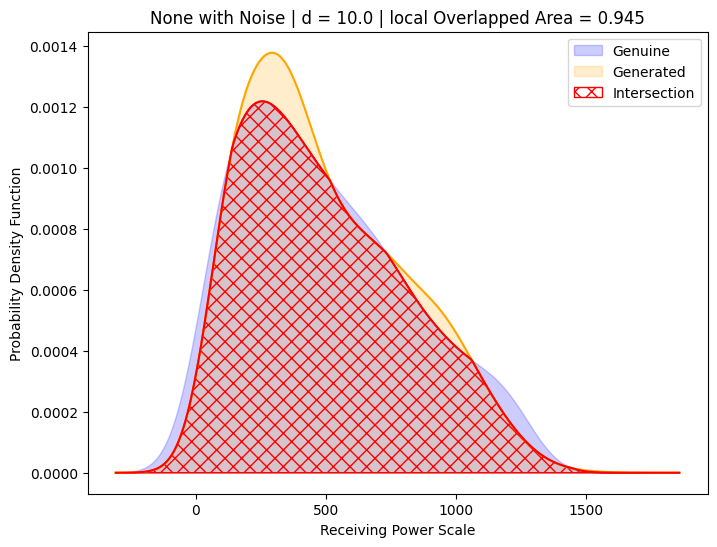

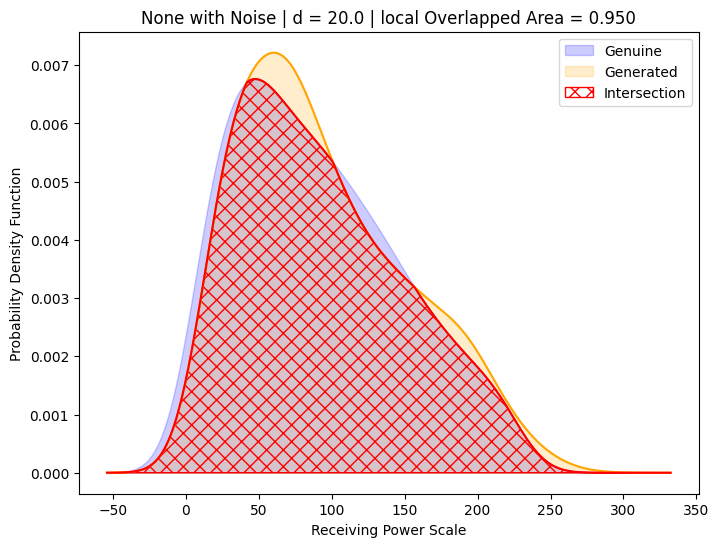

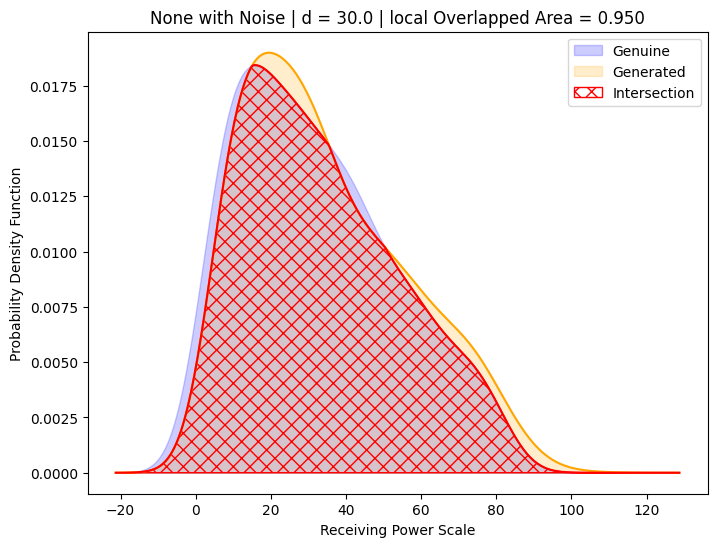

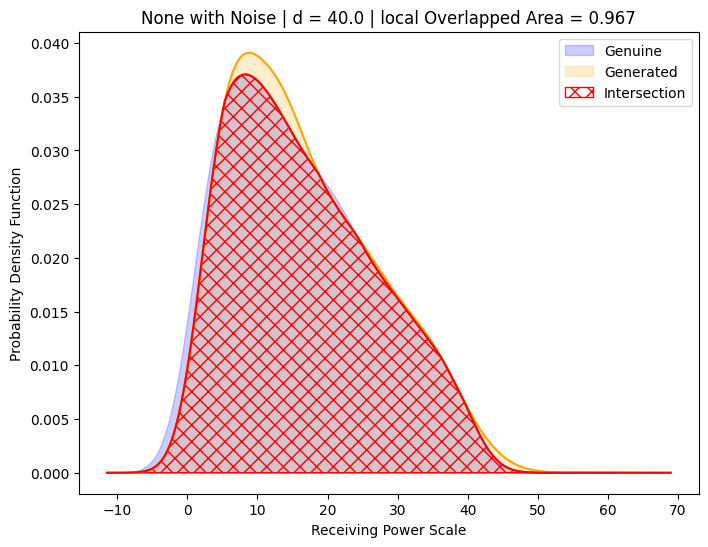

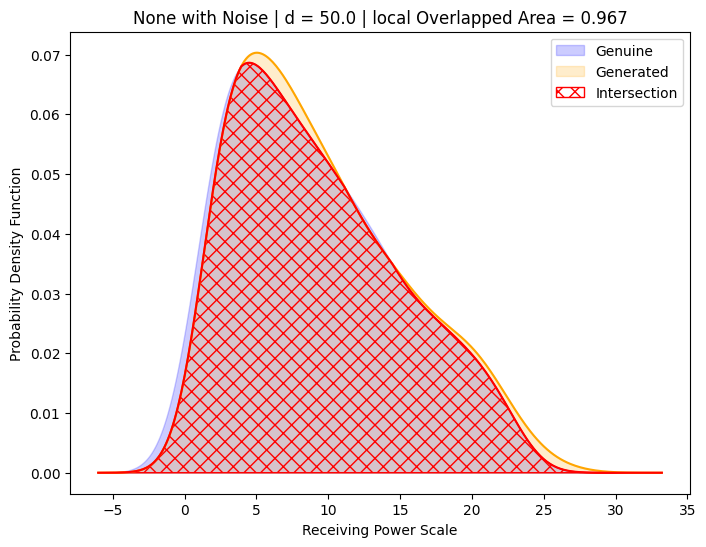

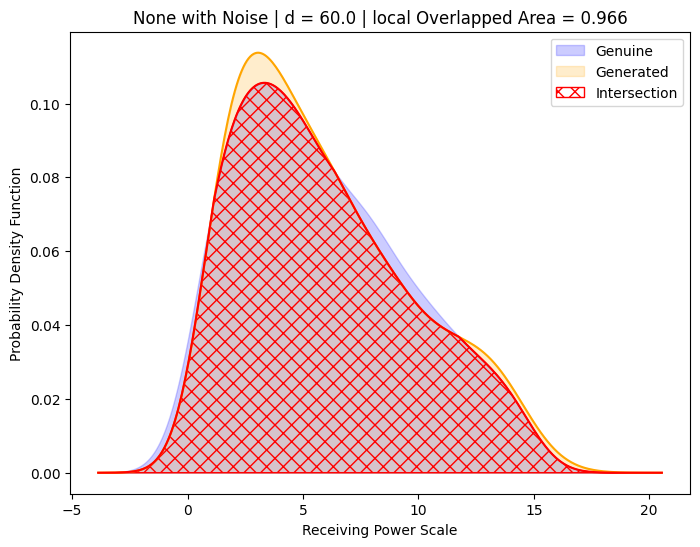

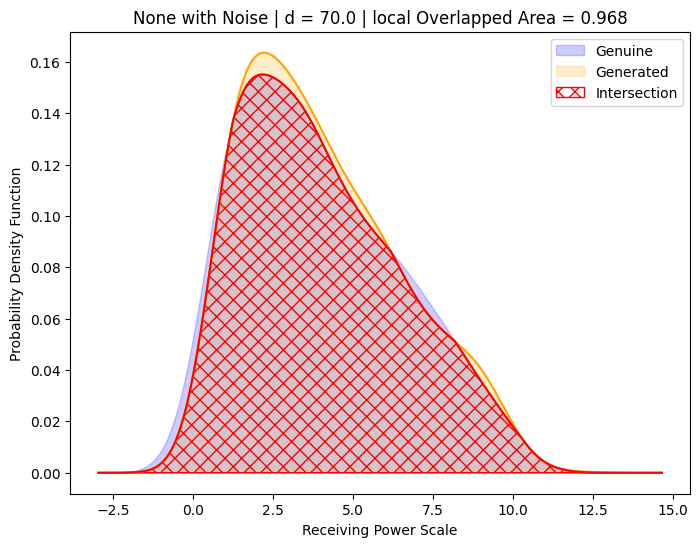

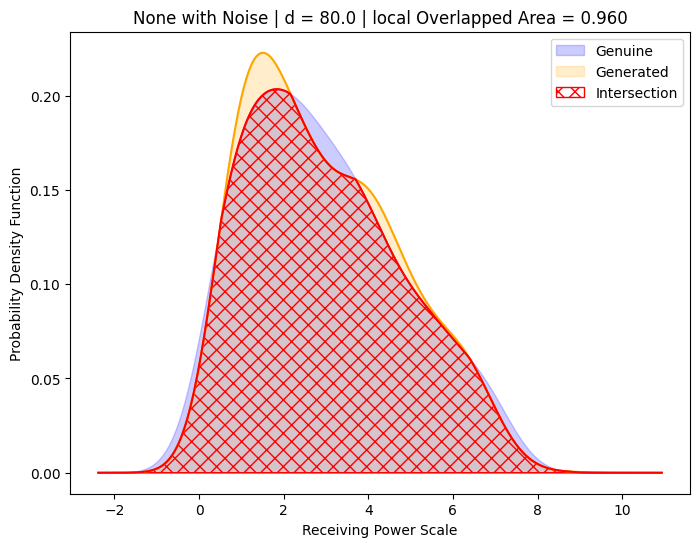

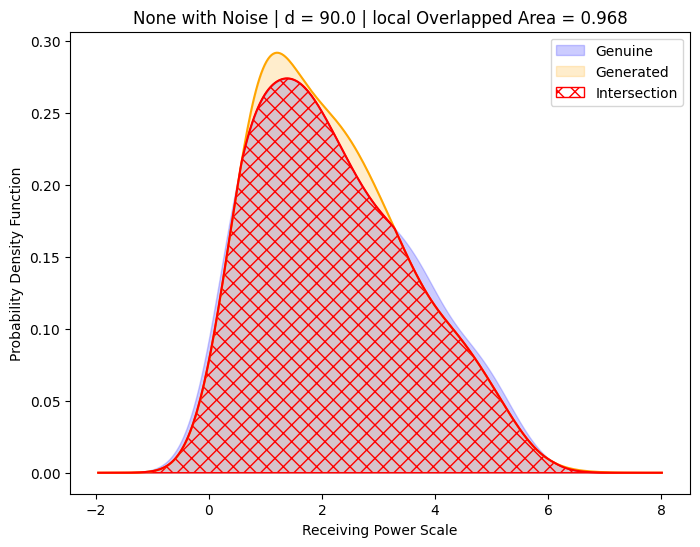

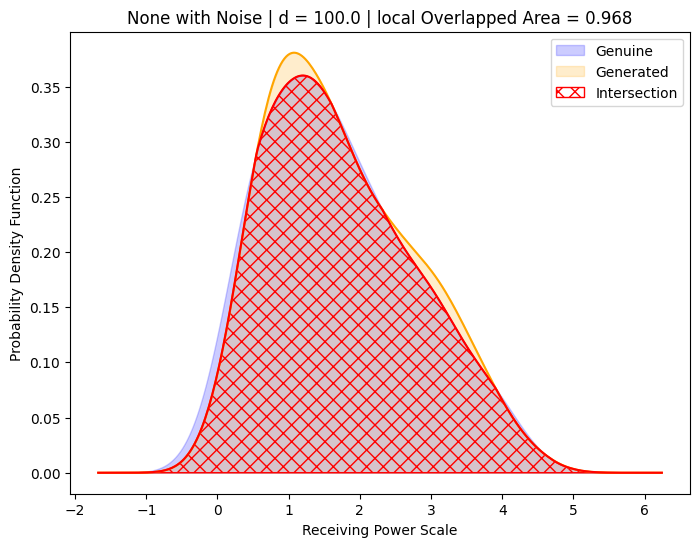

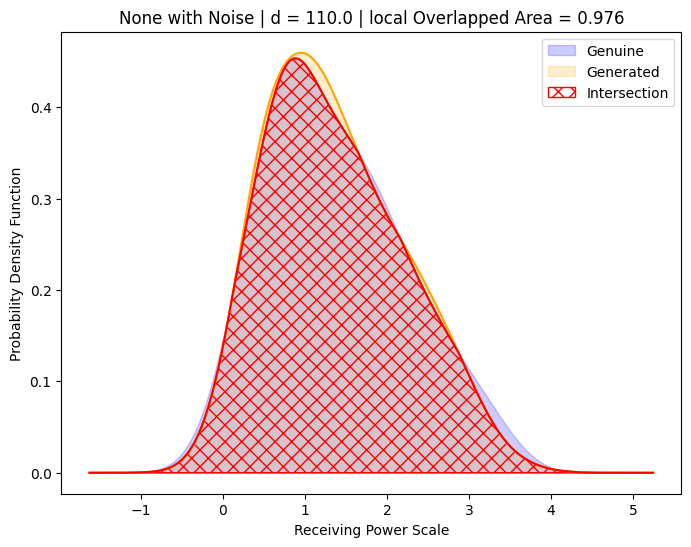

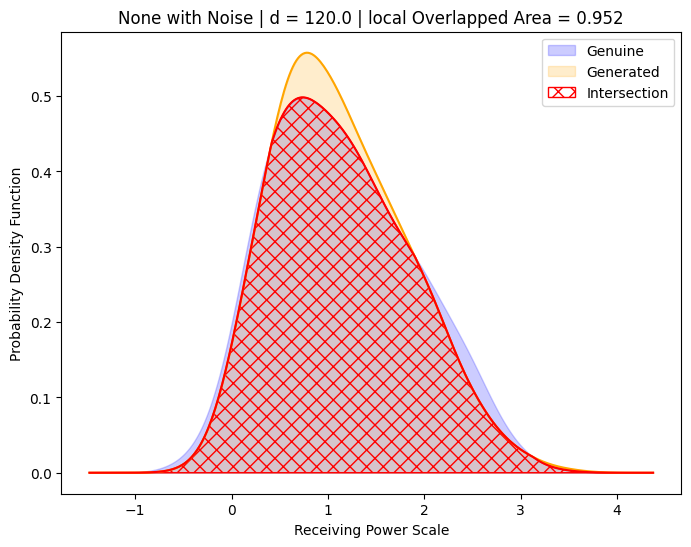

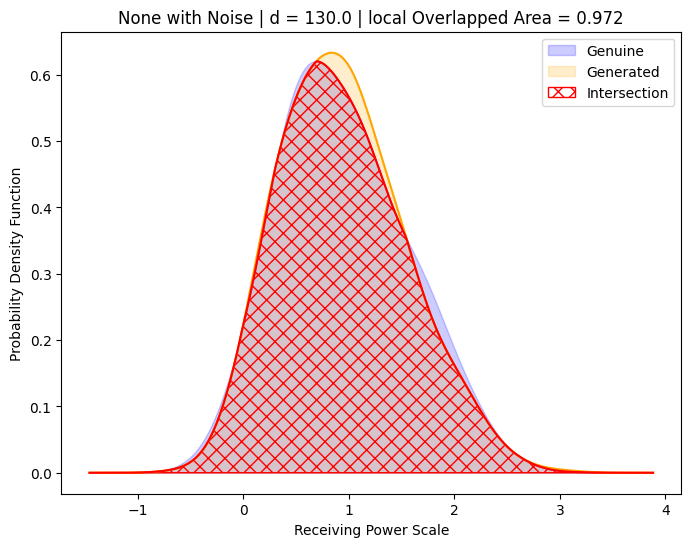

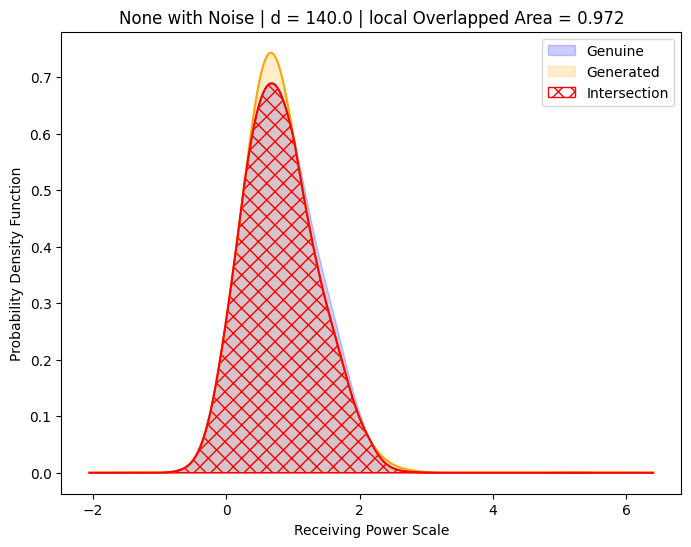

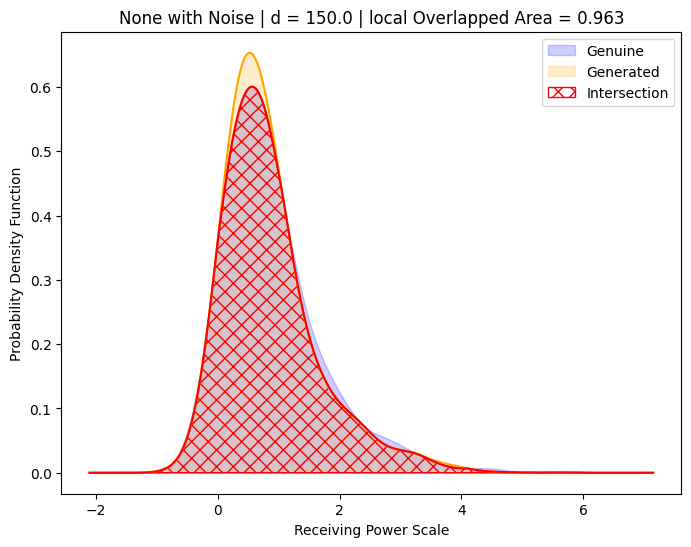

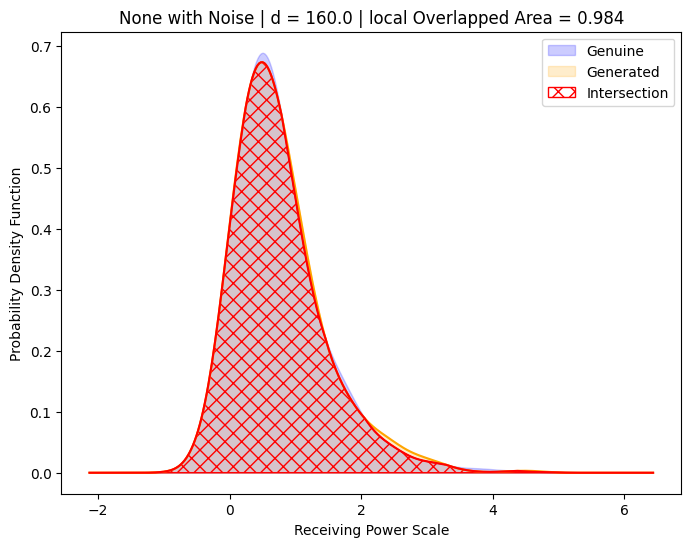

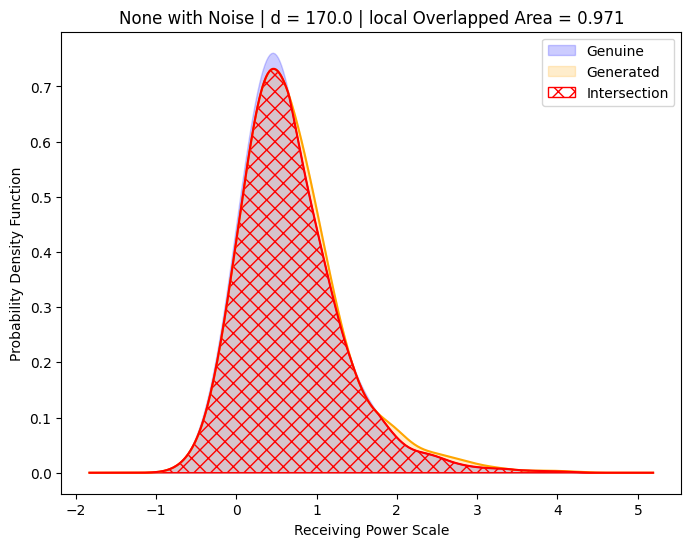

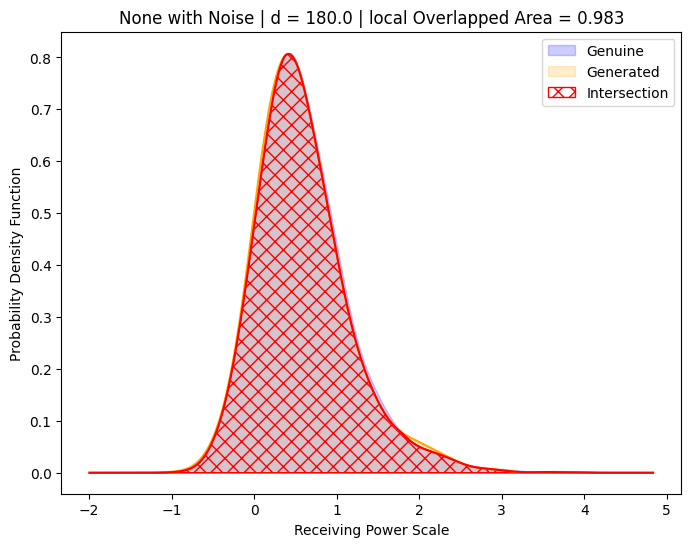

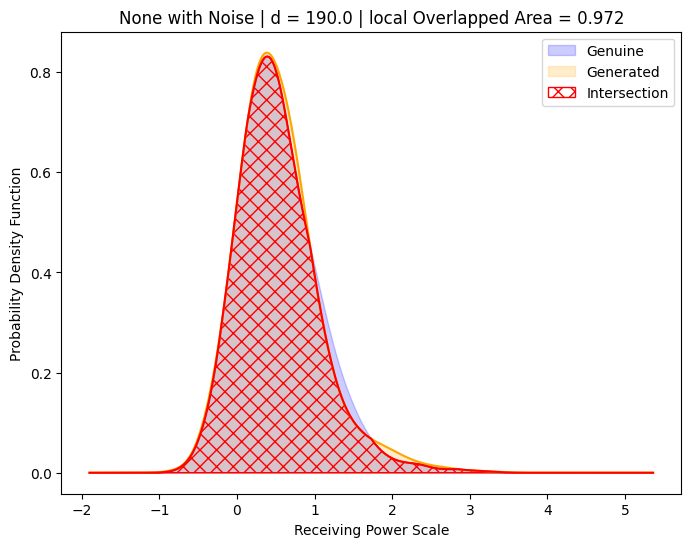

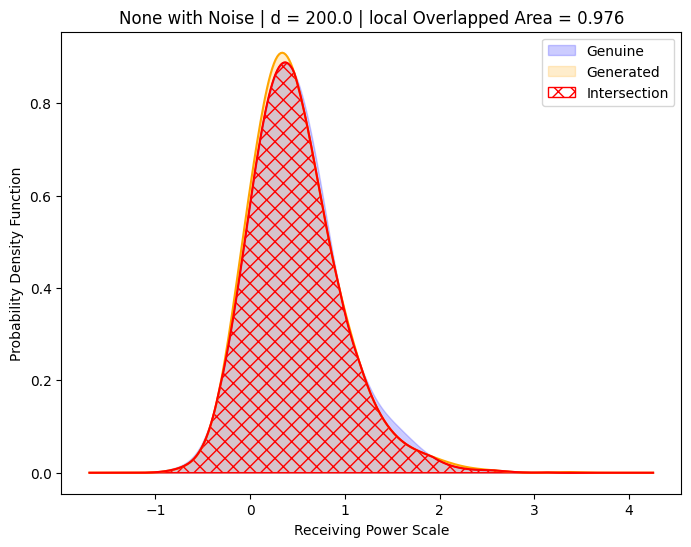

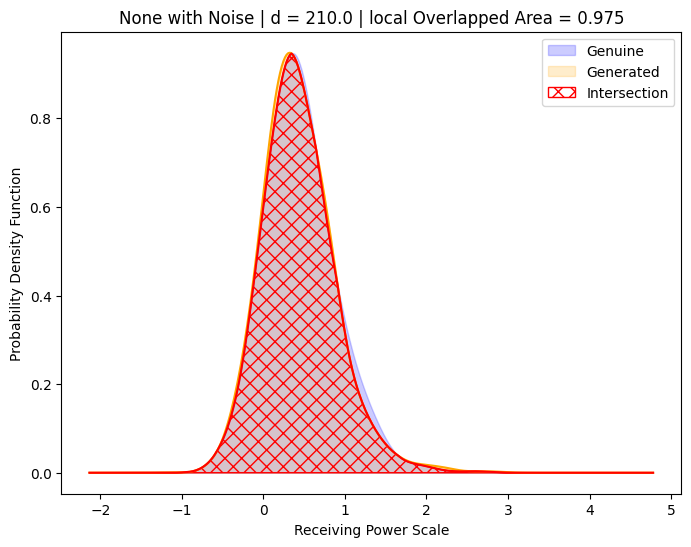

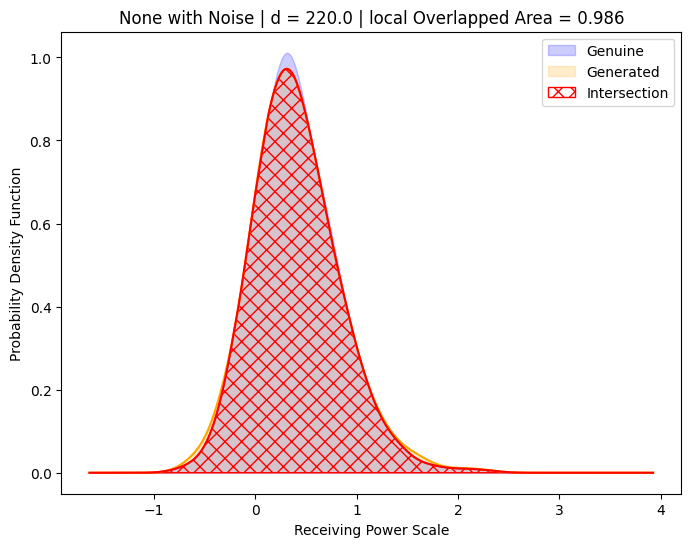

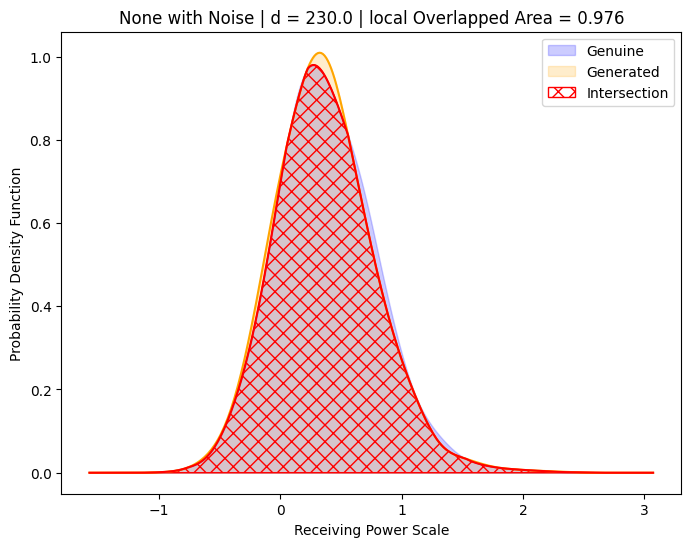

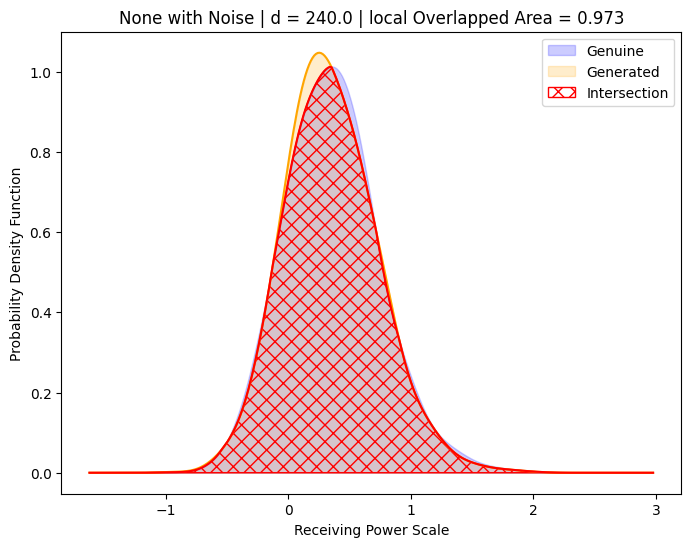

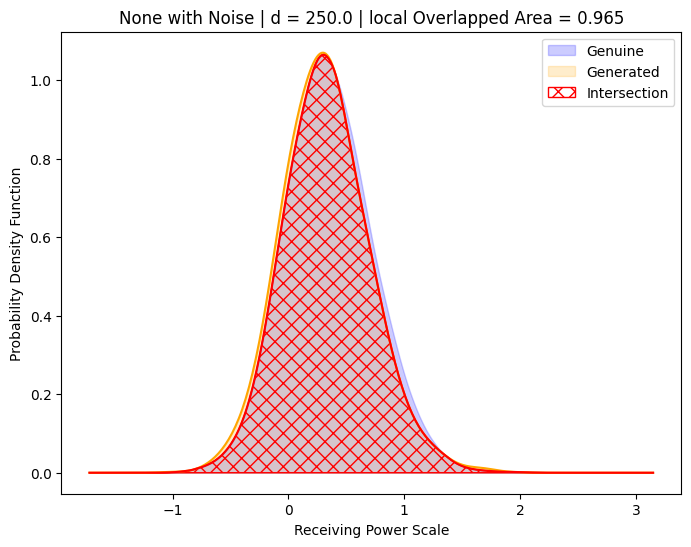

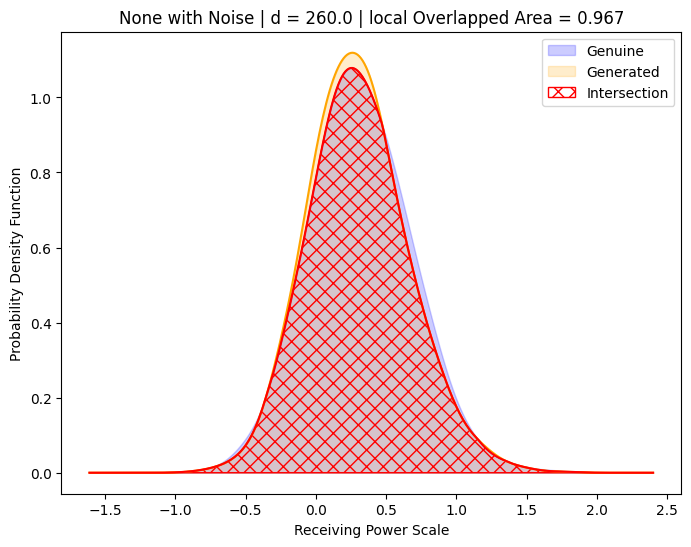

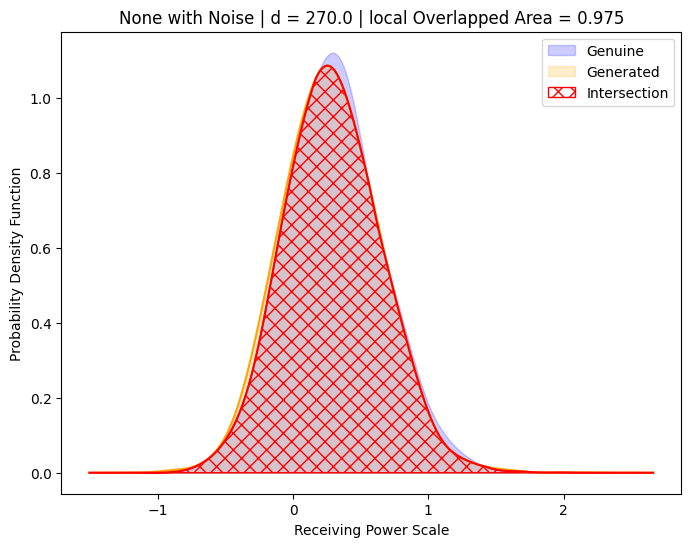

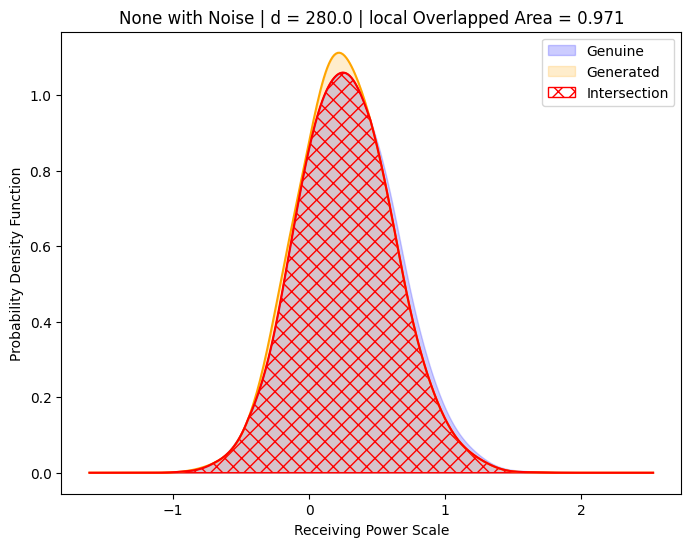

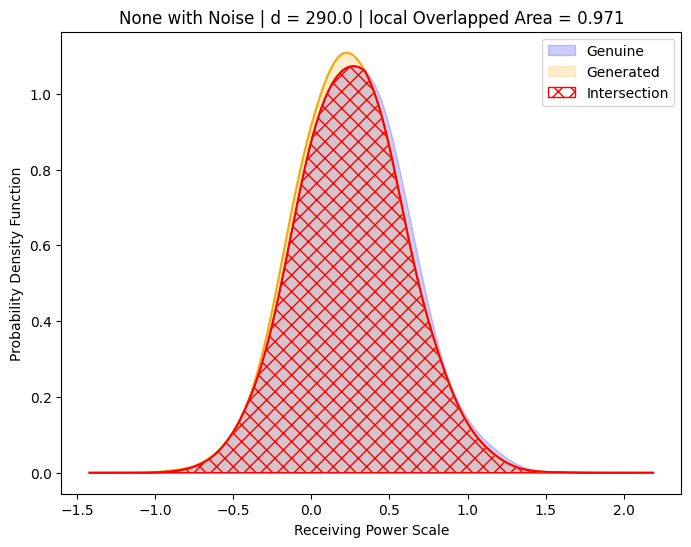

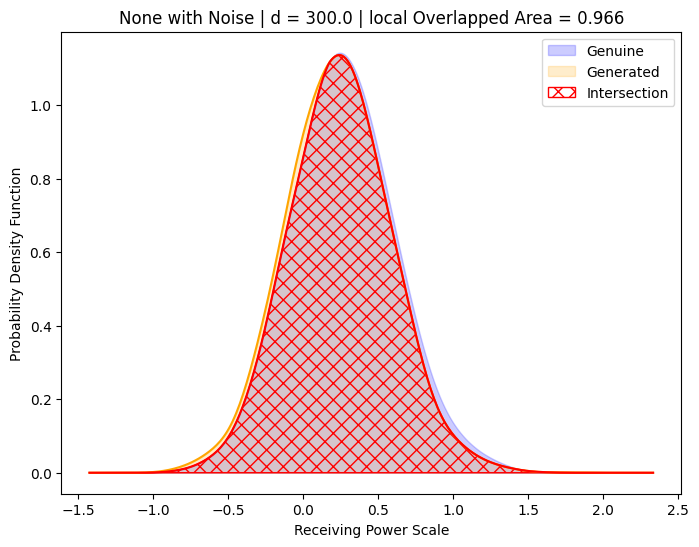

In [15]:
df_n1_n2_oa_best = evaluations.evaluation_OA(
    df_to_evaluate=df_n1_n2_test_back_scaled,
    name_model=None,
    dir_main_to_save=f"./evaluations",
    show_plot=True,
    to_save=False,
    # is_lognormal=True,
)

In [16]:
df_n1_n2_oa_best

d  area_overlapped
0    0.0         0.944507
1    1.0         0.949532
2    2.0         0.950037
3    3.0         0.966767
4    4.0         0.967281
5    5.0         0.965970
6    6.0         0.968043
7    7.0         0.960222
8    8.0         0.967788
9    9.0         0.967603
10  10.0         0.976489
11  11.0         0.952073
12  12.0         0.971834
13  13.0         0.972341
14  14.0         0.963398
15  15.0         0.984313
16  16.0         0.971159
17  17.0         0.982687
18  18.0         0.971860
19  19.0         0.976333
20  20.0         0.975482
21  21.0         0.985962
22  22.0         0.975519
23  23.0         0.972685
24  24.0         0.964552
25  25.0         0.967048
26  26.0         0.974805
27  27.0         0.970911
28  28.0         0.971287
29  29.0         0.966380

# Nakagami2 from __Global Median__ Nakagami 1

In [17]:
name_dir_n1_n2_med = "Nakagami1_Nakagami2_median"
dir_sub_n1_n2_med = "Nakagami2"
name_model_n1_n2_med = "Nakagami"
dir_n1_n2_med = f"{dir_main}/{name_dir_n1_n2_med}"

list_dir_csv_n1_n2_med = list()
for ep in range(max_iterations):
    list_dir_csv_n1_n2_med.append(f"{dir_n1_n2_med}/{ep}/{dir_sub_n1_n2_med}/log.csv")

list_dir_csv_n1_n2_med

['../saved_models/Nakagami1_Nakagami2_median/0/Nakagami2/log.csv',
 '../saved_models/Nakagami1_Nakagami2_median/1/Nakagami2/log.csv',
 '../saved_models/Nakagami1_Nakagami2_median/2/Nakagami2/log.csv',
 '../saved_models/Nakagami1_Nakagami2_median/3/Nakagami2/log.csv',
 '../saved_models/Nakagami1_Nakagami2_median/4/Nakagami2/log.csv',
 '../saved_models/Nakagami1_Nakagami2_median/5/Nakagami2/log.csv',
 '../saved_models/Nakagami1_Nakagami2_median/6/Nakagami2/log.csv',
 '../saved_models/Nakagami1_Nakagami2_median/7/Nakagami2/log.csv',
 '../saved_models/Nakagami1_Nakagami2_median/8/Nakagami2/log.csv',
 '../saved_models/Nakagami1_Nakagami2_median/9/Nakagami2/log.csv']

In [18]:
list_csv_n1_n2_med = list()
for version, local_dir in enumerate(list_dir_csv_n1_n2_med):
    local_df_n1_n2_med = pd.read_csv(local_dir)
    local_df_n1_n2_med['version'] = version
    list_csv_n1_n2_med.append(local_df_n1_n2_med)

list_csv_n1_n2_med

[    epoch      loss  val_loss    avg_oa       std  version
 0       1  0.038694  0.027602  0.957654  0.020958        0
 1       2  0.025833  0.032889  0.938473  0.014332        0
 2       3  0.029575  0.033197  0.952552  0.020466        0
 3       4  0.024267  0.033611  0.937249  0.015527        0
 4       5  0.023768  0.026181  0.960814  0.009941        0
 5       6  0.025085  0.025308  0.967710  0.014474        0
 6       7  0.022882  0.031256  0.934834  0.011166        0
 7       8  0.022648  0.023333  0.965460  0.013240        0
 8       9  0.022162  0.021668  0.965230  0.017891        0
 9      10  0.021224  0.023948  0.961514  0.016983        0
 10     11  0.021843  0.024648  0.970341  0.009693        0
 11     12  0.020714  0.021945  0.957143  0.008774        0
 12     13  0.021858  0.022745  0.954934  0.012738        0
 13     14  0.021882  0.024271  0.966501  0.012393        0
 14     15  0.022650  0.029856  0.944988  0.022947        0,
     epoch      loss  val_loss    avg_o

In [19]:
df_whole_n1_n2_med = pd.concat(list_csv_n1_n2_med, axis=0).reset_index(drop=True)
df_whole_n1_n2_med['metric'] = df_whole_n1_n2_med['avg_oa'] - 2 * df_whole_n1_n2_med['std']
df_whole_n1_n2_med

epoch      loss  val_loss    avg_oa       std  version    metric
0        1  0.038694  0.027602  0.957654  0.020958        0  0.915737
1        2  0.025833  0.032889  0.938473  0.014332        0  0.909809
2        3  0.029575  0.033197  0.952552  0.020466        0  0.911620
3        4  0.024267  0.033611  0.937249  0.015527        0  0.906195
4        5  0.023768  0.026181  0.960814  0.009941        0  0.940933
..     ...       ...       ...       ...       ...      ...       ...
145     11  0.021987  0.026864  0.955810  0.021913        9  0.911984
146     12  0.024166  0.022130  0.958313  0.018841        9  0.920632
147     13  0.031008  0.036034  0.945245  0.020896        9  0.903453
148     14  0.022224  0.020243  0.964566  0.014980        9  0.934606
149     15  0.020654  0.021033  0.963780  0.013536        9  0.936708

[150 rows x 7 columns]

In [20]:
df_whole_n1_n2_med[df_whole_n1_n2_med['loss'].isna()]['version'].unique()

array([], dtype=int64)

In [21]:
df_whole_n1_n2_med.groupby(by=['epoch']).mean()

loss  val_loss    avg_oa       std  version    metric
epoch                                                           
1      0.040446  0.028673  0.957345  0.018331      4.5  0.920683
2      0.026704  0.028466  0.953870  0.016088      4.5  0.921694
3      0.026443  0.026591  0.957050  0.016837      4.5  0.923376
4      0.026055  0.026300  0.952320  0.016714      4.5  0.918891
5      0.024389  0.023617  0.963588  0.014536      4.5  0.934516
6      0.024151  0.024614  0.961294  0.013558      4.5  0.934178
7      0.023244  0.025870  0.957170  0.015977      4.5  0.925216
8      0.023058  0.023664  0.959605  0.014767      4.5  0.930070
9      0.022876  0.022932  0.960776  0.015689      4.5  0.929398
10     0.023405  0.023830  0.960590  0.014608      4.5  0.931375
11     0.022450  0.025081  0.958341  0.015749      4.5  0.926843
12     0.022783  0.022451  0.958533  0.014899      4.5  0.928735
13     0.023396  0.025206  0.959721  0.016468      4.5  0.926784
14     0.023661  0.024362  0.957026  0.014804      4.5  0.927418
15     0.025727  0.024609  0.961048  0.016643      4.5  0.927762

In [22]:
df_whole_n1_n2_med.groupby(by=['epoch'])['avg_oa'].mean(), df_whole_n1_n2_med.groupby(by=['epoch'])['avg_oa'].std()

(epoch
 1     0.957345
 2     0.953870
 3     0.957050
 4     0.952320
 5     0.963588
 6     0.961294
 7     0.957170
 8     0.959605
 9     0.960776
 10    0.960590
 11    0.958341
 12    0.958533
 13    0.959721
 14    0.957026
 15    0.961048
 Name: avg_oa, dtype: float64,
 epoch
 1     0.003441
 2     0.009644
 3     0.008023
 4     0.009499
 5     0.003579
 6     0.006957
 7     0.010510
 8     0.005480
 9     0.006171
 10    0.005999
 11    0.014135
 12    0.009191
 13    0.007851
 14    0.011177
 15    0.008684
 Name: avg_oa, dtype: float64)

In [23]:
df_whole_n1_n2_med.groupby(by=['epoch']).apply(lambda x: x)

/tmp/ipykernel_799014/296278450.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_whole_n1_n2_med.groupby(by=['epoch']).apply(lambda x: x)


epoch      loss  val_loss    avg_oa       std  version    metric
epoch                                                                      
1     0        1  0.038694  0.027602  0.957654  0.020958        0  0.915737
      15       1  0.040705  0.025866  0.959526  0.018835        1  0.921856
      30       1  0.040720  0.027473  0.963293  0.015485        2  0.932322
      45       1  0.039506  0.022397  0.954969  0.016360        3  0.922249
      60       1  0.043343  0.028768  0.957433  0.020900        4  0.915632
...          ...       ...       ...       ...       ...      ...       ...
15    89      15  0.053789  0.041442  0.946965  0.029959        5  0.887048
      104     15  0.022011  0.022884  0.965083  0.016364        6  0.932355
      119     15  0.021689  0.023279  0.960190  0.013614        7  0.932961
      134     15  0.022872  0.022199  0.968415  0.015684        8  0.937046
      149     15  0.020654  0.021033  0.963780  0.013536        9  0.936708

[150 rows x 7 columns]

## Best Nakagami 2

In [24]:
# Best Nakagami Model
best_version_n1_n2_med = df_whole_n1_n2_med.sort_values(by='metric', ascending=False).iloc[[0]]['version'].values[0]
best_epoch_n1_n2_med = df_whole_n1_n2_med.sort_values(by='metric', ascending=False).iloc[[0]]['epoch'].values[0]
df_whole_n1_n2_med.sort_values(by='metric', ascending=False).iloc[[0]]

epoch      loss  val_loss    avg_oa       std  version    metric
114     10  0.023087  0.022212  0.971836  0.009241        7  0.953355

In [25]:
best_version_n1_n2_med, best_epoch_n1_n2_med

(7, 10)

In [26]:
df_n1_n2_med_test_back_scaled = df_n2_test_back_scaled.copy()

model_mdn = tf.keras.models.load_model(
    f"{dir_n1_n2_med}/{best_version_n1_n2_med}/{dir_sub_n1_n2_med}/{name_model_n1_n2_med}_ep_{str(best_epoch_n1_n2_med).zfill(2)}.h5", 
    custom_objects={"mdn_loss":model.model_MDN().mdn_loss}
)

predicted_n1_n2_med_data = model_mdn.predict(df_n1_n2_med_test_back_scaled['d'])
df_n1_n2_med_test_back_scaled['generated'] = utils.inverse_log_transform_n(np.squeeze(predicted_n1_n2_med_data))



3125/3125 [==============================] - 3s 998us/step


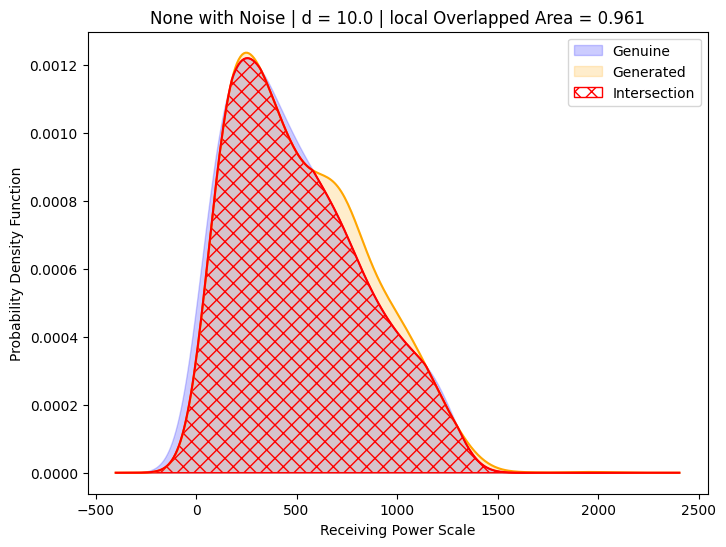

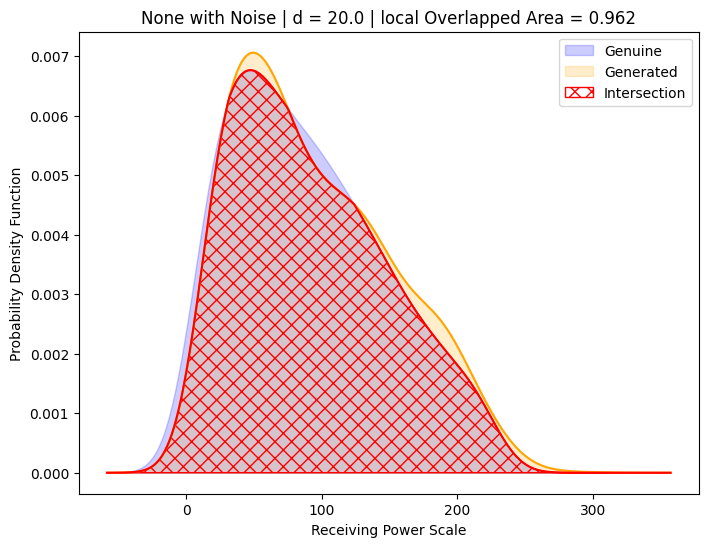

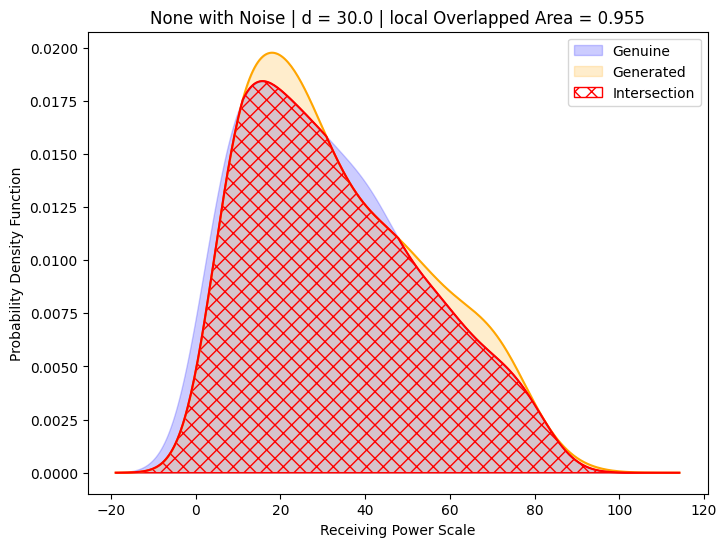

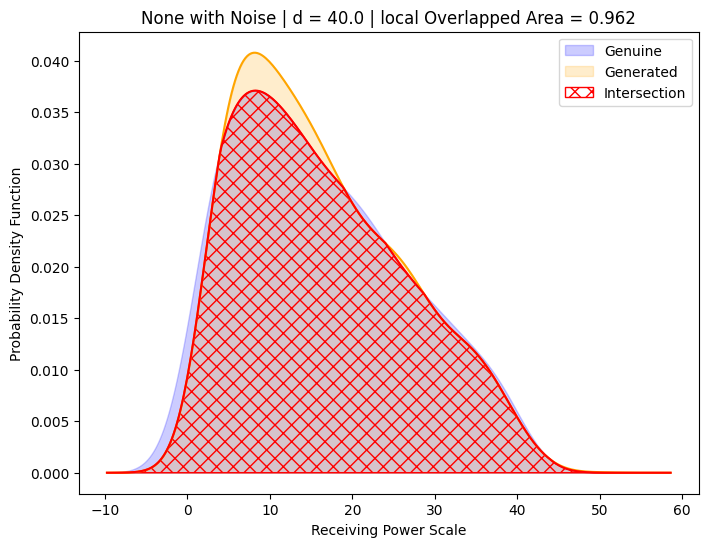

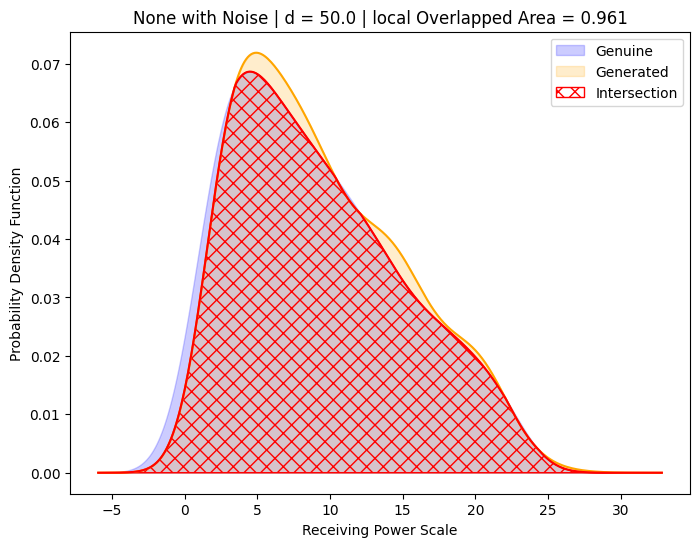

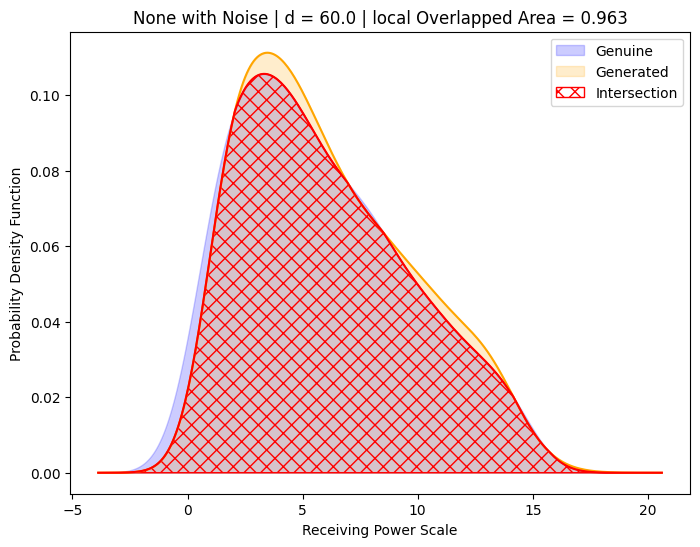

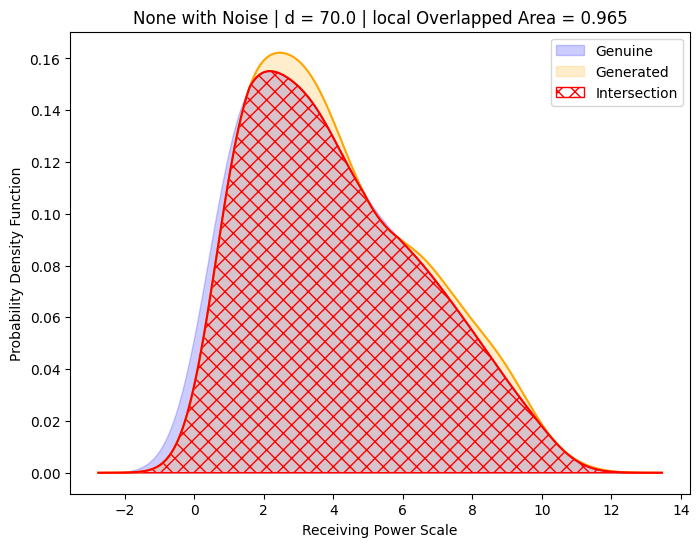

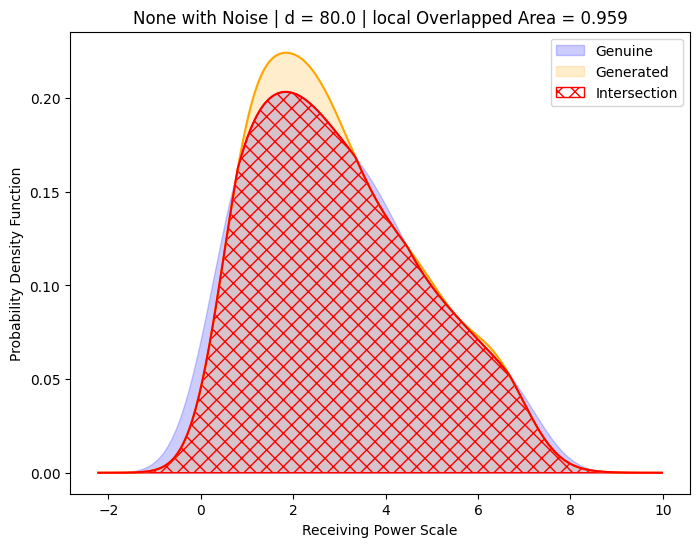

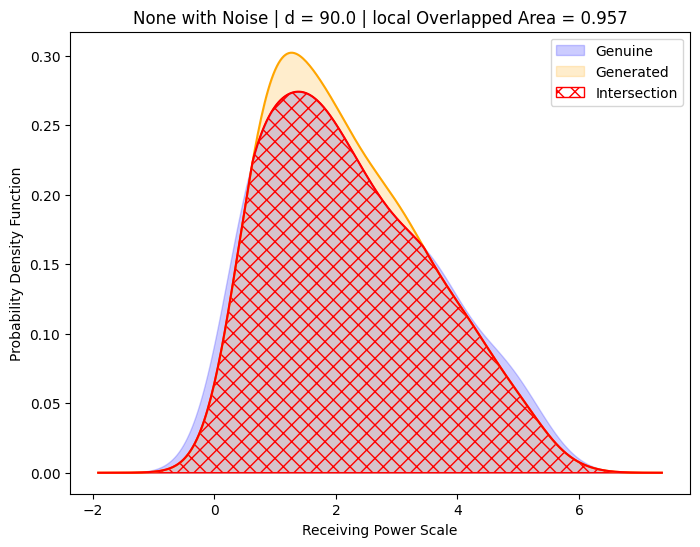

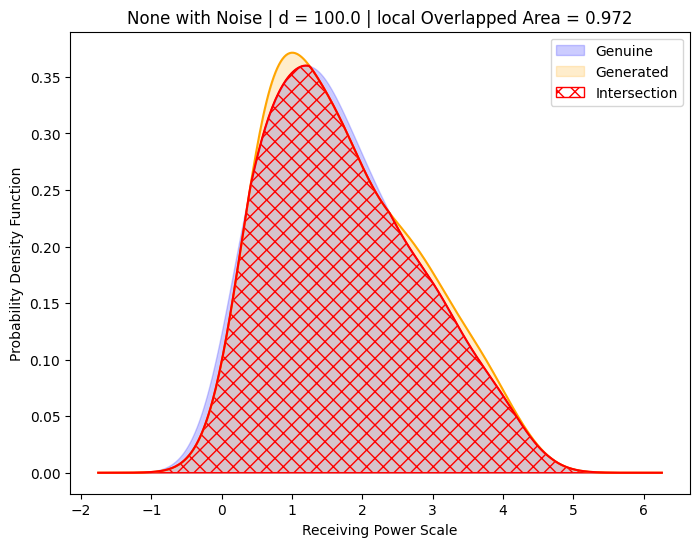

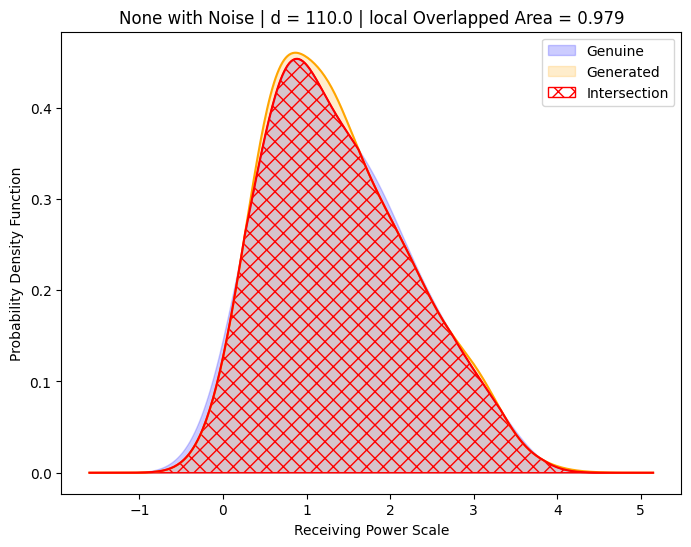

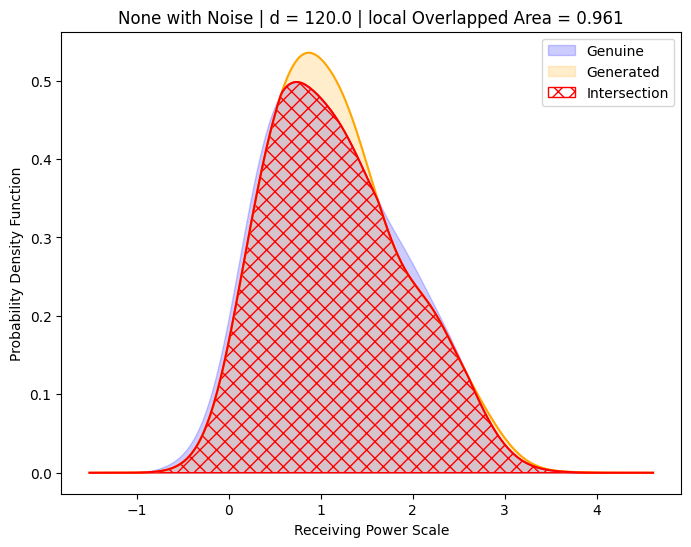

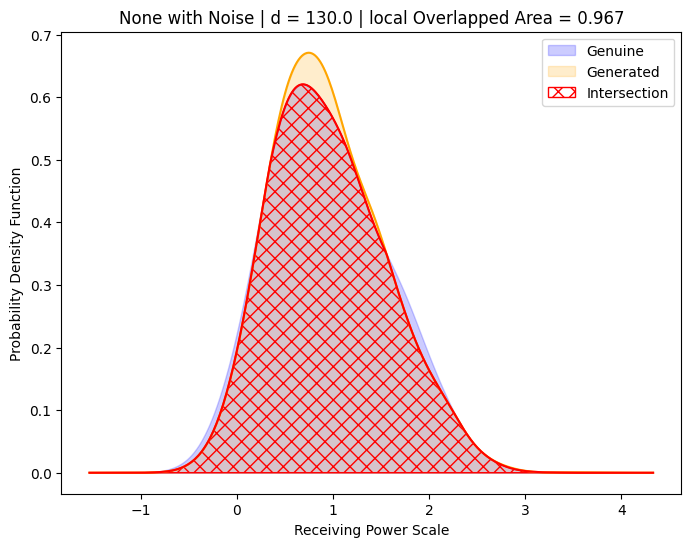

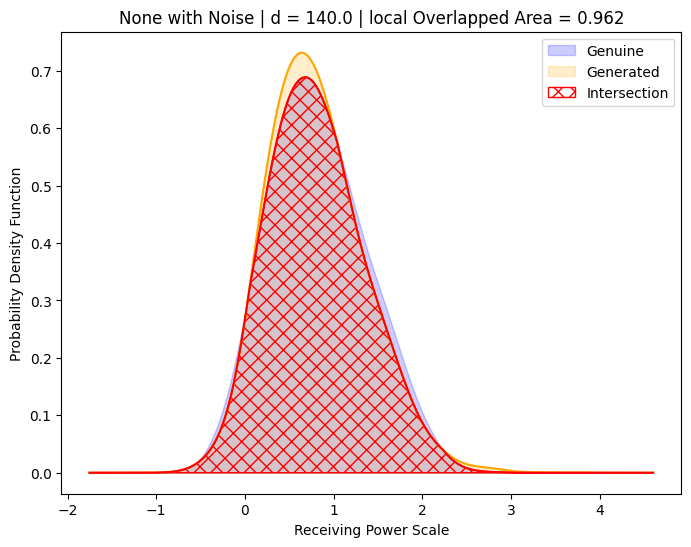

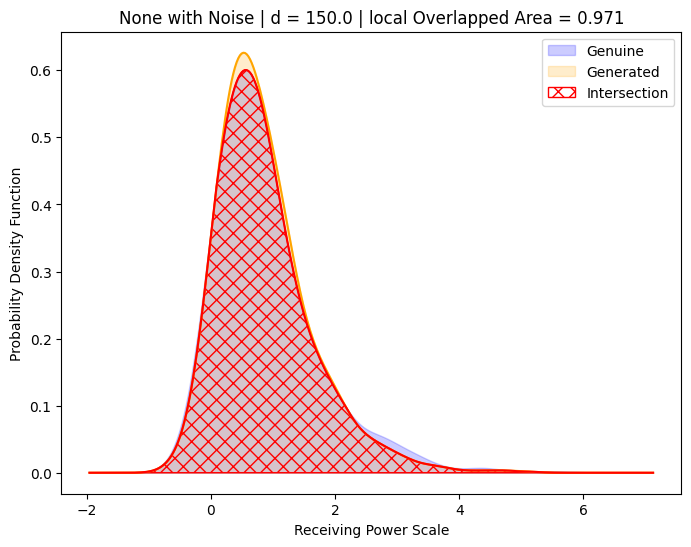

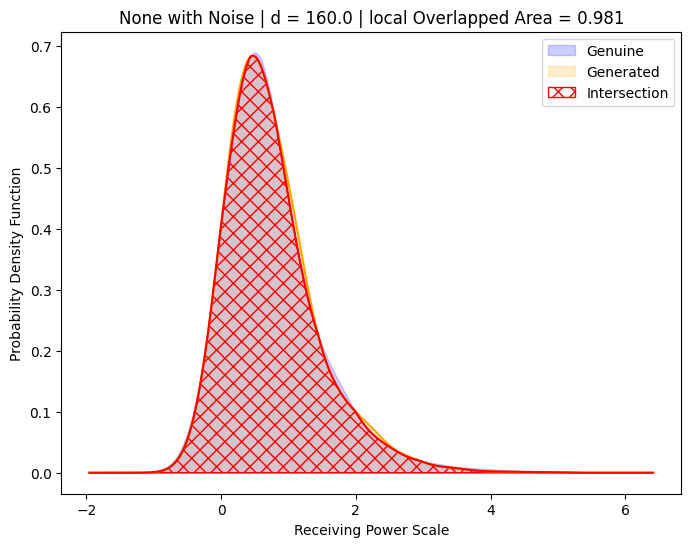

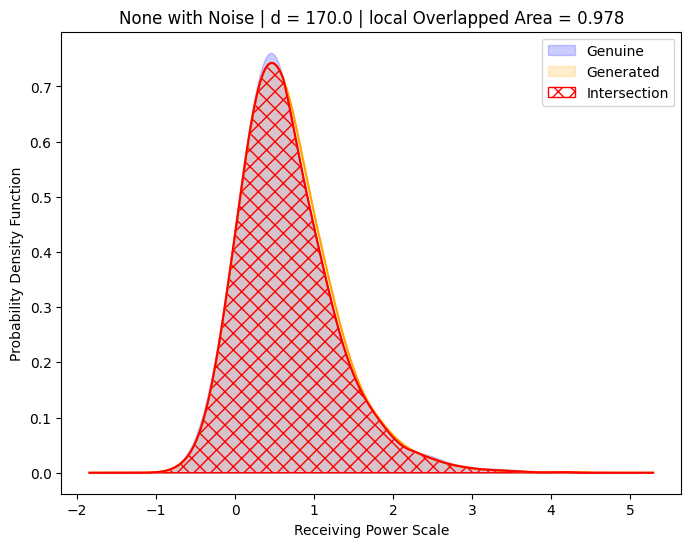

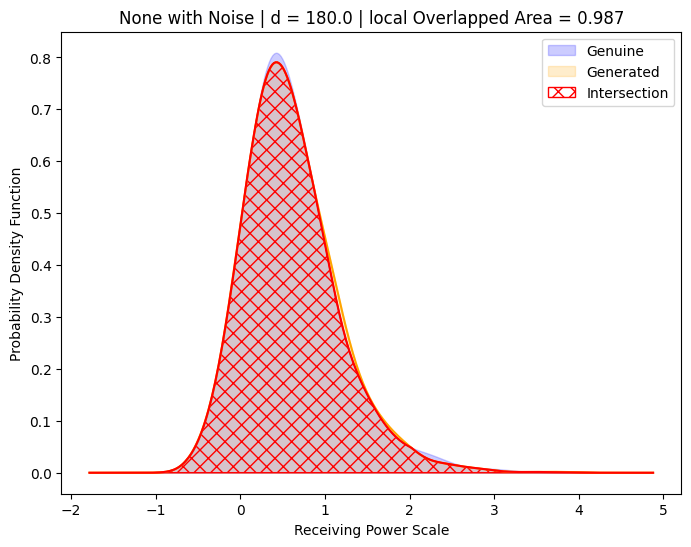

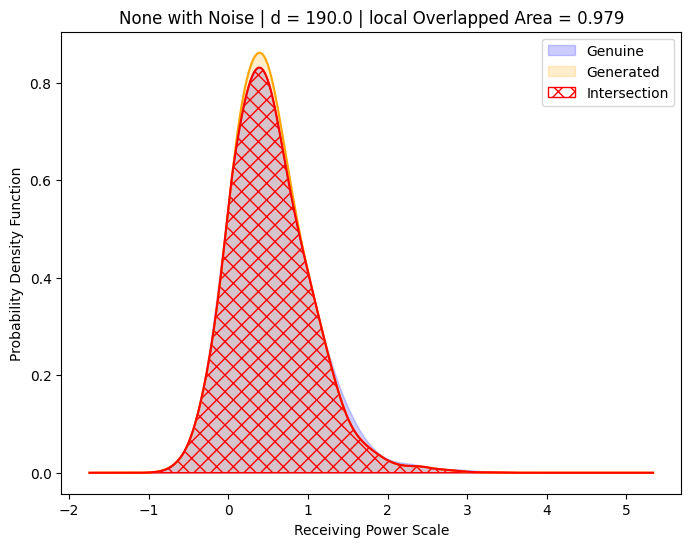

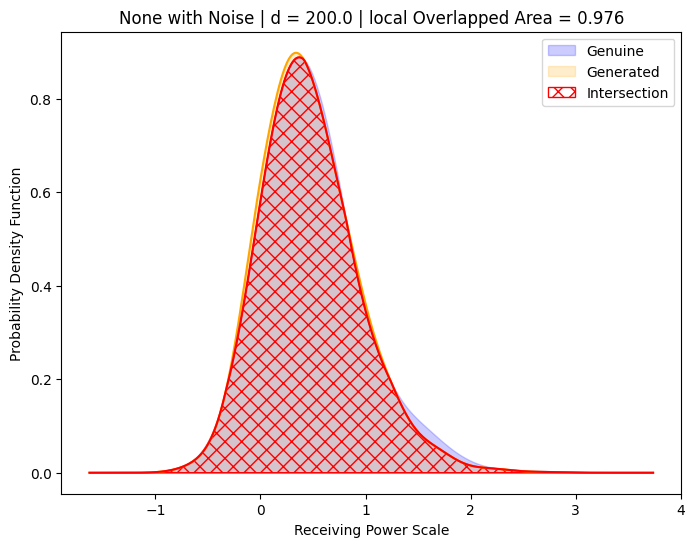

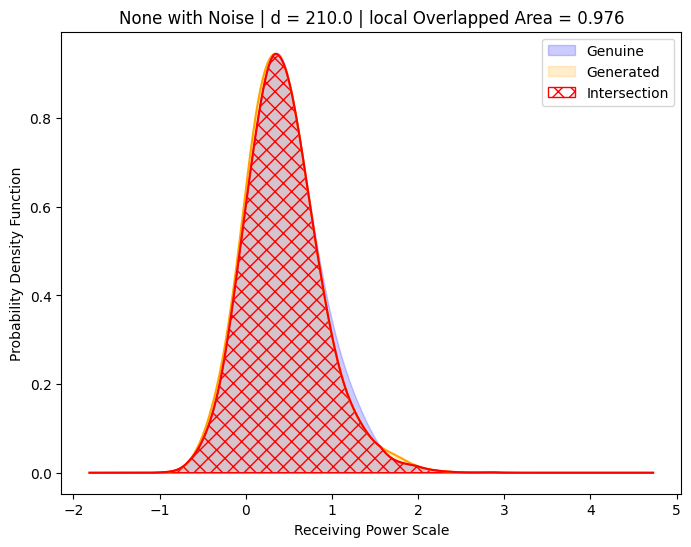

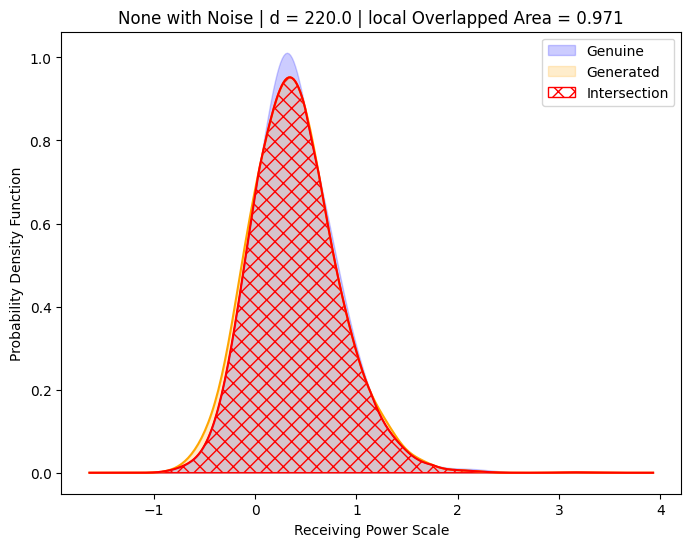

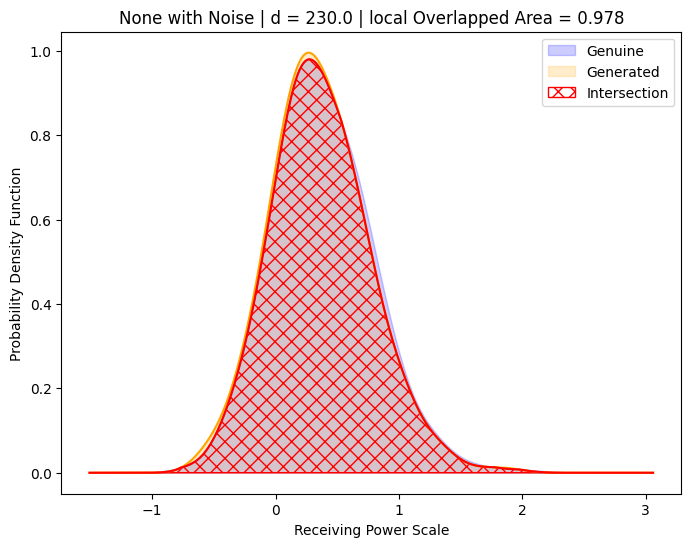

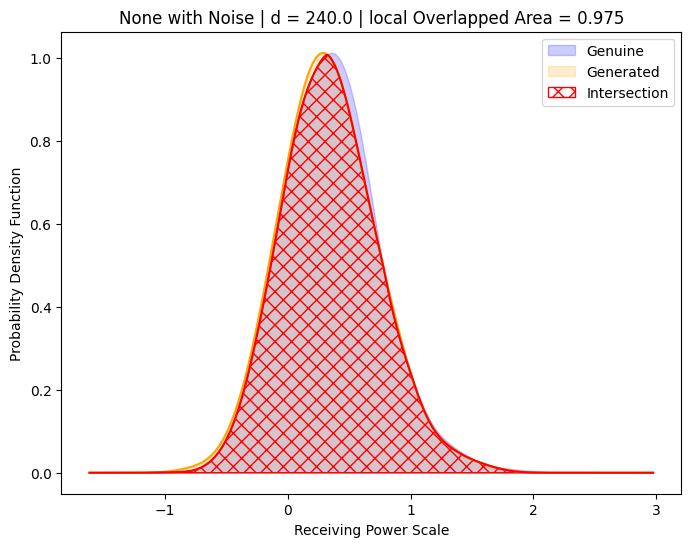

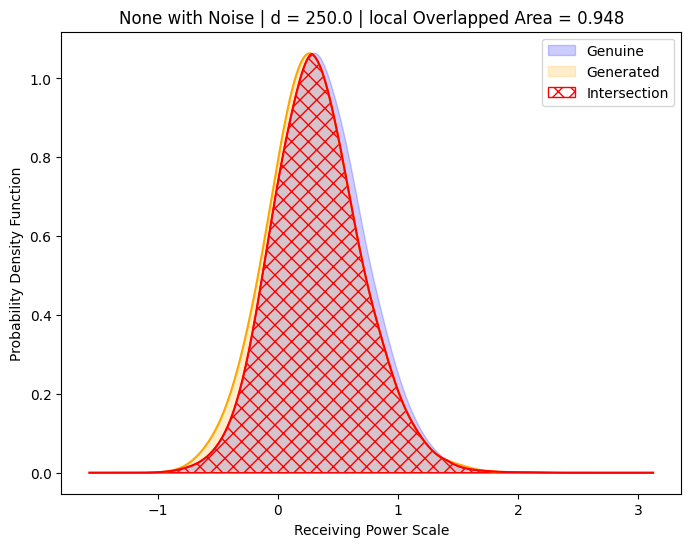

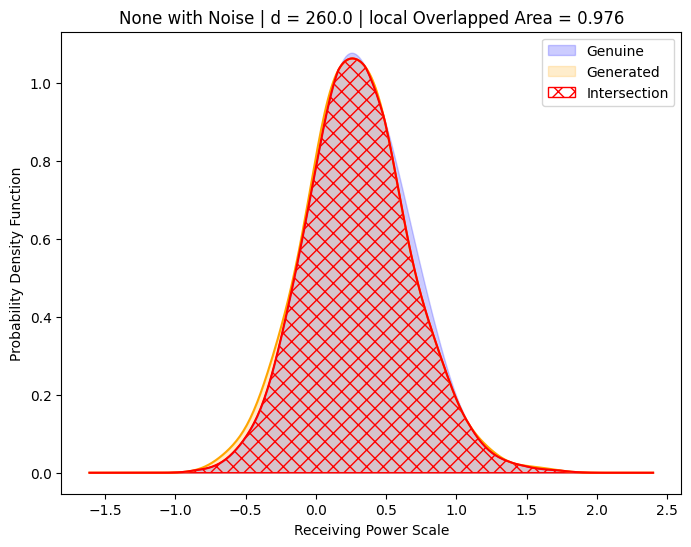

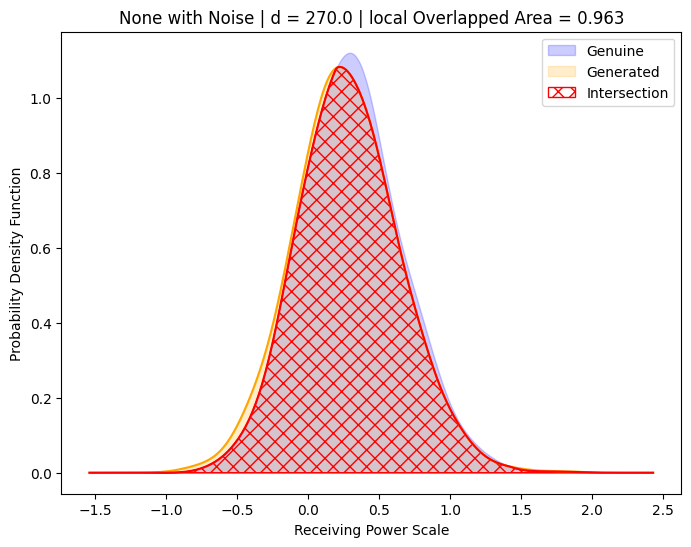

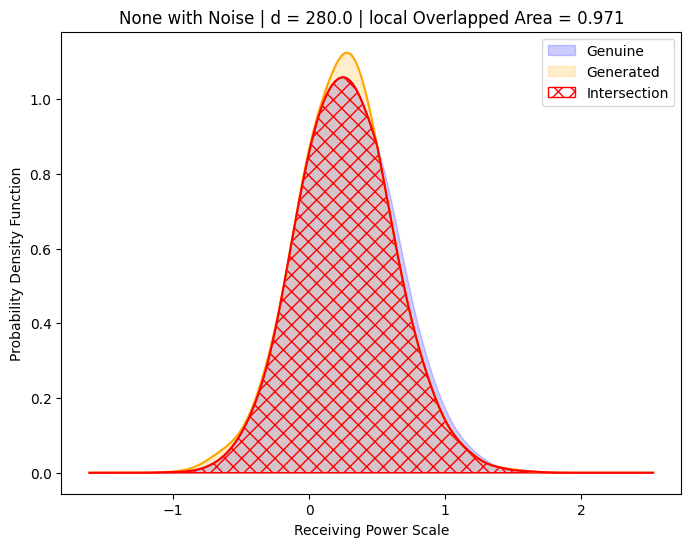

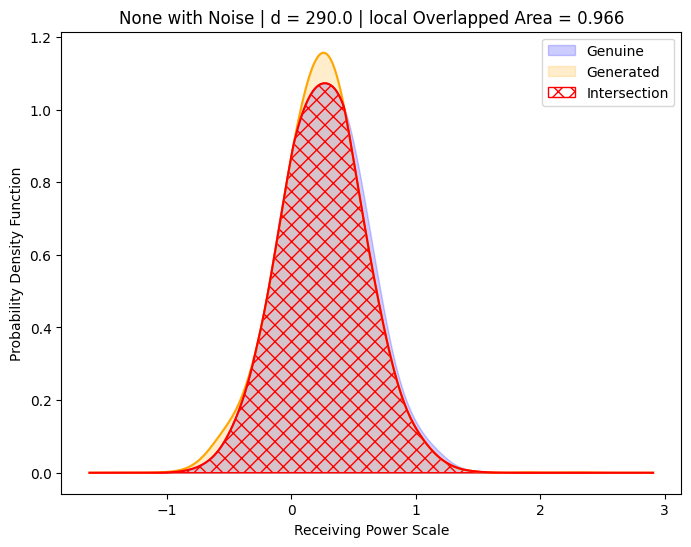

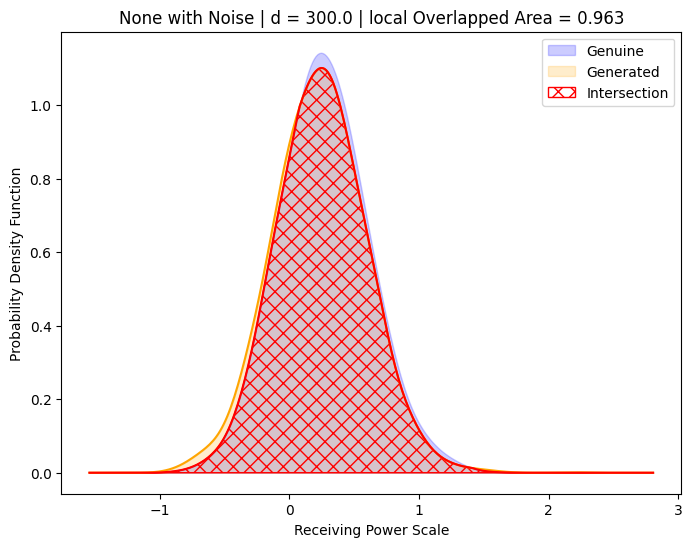

In [27]:
df_n1_n2_med_oa_best = evaluations.evaluation_OA(
    df_to_evaluate=df_n1_n2_med_test_back_scaled,
    name_model=None,
    dir_main_to_save=f"./evaluations",
    show_plot=True,
    to_save=False,
    # is_lognormal=True,
)

In [28]:
df_n1_n2_med_oa_best

d  area_overlapped
0    0.0         0.960532
1    1.0         0.962074
2    2.0         0.954627
3    3.0         0.961960
4    4.0         0.961257
5    5.0         0.963281
6    6.0         0.964703
7    7.0         0.959364
8    8.0         0.956884
9    9.0         0.972209
10  10.0         0.978931
11  11.0         0.961055
12  12.0         0.967060
13  13.0         0.961899
14  14.0         0.970806
15  15.0         0.980678
16  16.0         0.977578
17  17.0         0.987074
18  18.0         0.978743
19  19.0         0.975725
20  20.0         0.975753
21  21.0         0.970896
22  22.0         0.978078
23  23.0         0.974593
24  24.0         0.948104
25  25.0         0.976158
26  26.0         0.962909
27  27.0         0.971091
28  28.0         0.965951
29  29.0         0.963094

# Nakagami2 from __Random Init__

In [29]:
name_dir_n2_f = "Nakagami2_from_N_False"
dir_sub_n2_f = "Nakagami"
name_model_n2_f= "Nakagami"
dir_n2_f = f"{dir_main}/{name_dir_n2_f}"

list_dir_csv_n2_f = list()
for ep in range(max_iterations):
    list_dir_csv_n2_f.append(f"{dir_n2_f}/{ep}/{dir_sub_n2_f}/log.csv")

list_dir_csv_n2_f

['../saved_models/Nakagami2_from_N_False/0/Nakagami/log.csv',
 '../saved_models/Nakagami2_from_N_False/1/Nakagami/log.csv',
 '../saved_models/Nakagami2_from_N_False/2/Nakagami/log.csv',
 '../saved_models/Nakagami2_from_N_False/3/Nakagami/log.csv',
 '../saved_models/Nakagami2_from_N_False/4/Nakagami/log.csv',
 '../saved_models/Nakagami2_from_N_False/5/Nakagami/log.csv',
 '../saved_models/Nakagami2_from_N_False/6/Nakagami/log.csv',
 '../saved_models/Nakagami2_from_N_False/7/Nakagami/log.csv',
 '../saved_models/Nakagami2_from_N_False/8/Nakagami/log.csv',
 '../saved_models/Nakagami2_from_N_False/9/Nakagami/log.csv']

In [30]:
list_csv_n2_f = list()
for version, local_dir in enumerate(list_dir_csv_n2_f):
    local_df_n2_f = pd.read_csv(local_dir)
    local_df_n2_f['version'] = version
    list_csv_n2_f.append(local_df_n2_f)

list_csv_n2_f

[    epoch      loss  val_loss    avg_oa       std  version
 0       1  1.811668  1.356621  0.282963  0.214350        0
 1       2  0.454757  0.061834  0.907374  0.030581        0
 2       3  0.041407  0.025974  0.953391  0.017783        0
 3       4  0.029677  0.022532  0.950282  0.017253        0
 4       5  0.028530  0.021283  0.963001  0.020204        0
 5       6  0.027657  0.020155  0.959830  0.014664        0
 6       7  0.027789  0.023564  0.955338  0.010821        0
 7       8  0.027114  0.020979  0.948762  0.016576        0
 8       9  0.024437  0.023885  0.959488  0.022776        0
 9      10  0.024578  0.015578  0.961172  0.014969        0
 10     11  0.023856  0.018836  0.955391  0.011744        0
 11     12  0.023305  0.019006  0.951651  0.015361        0
 12     13  0.022753  0.021708  0.937796  0.014041        0
 13     14  0.022275  0.018345  0.960699  0.020532        0
 14     15  0.023070  0.016171  0.960318  0.014096        0,
     epoch      loss  val_loss    avg_o

In [31]:
df_whole_n2_f = pd.concat(list_csv_n2_f, axis=0).reset_index(drop=True)
df_whole_n2_f['metric'] = df_whole_n2_f['avg_oa'] - 2 * df_whole_n2_f['std']
df_whole_n2_f

epoch      loss  val_loss    avg_oa       std  version    metric
0        1  1.811668  1.356621  0.282963  0.214350        0 -0.145738
1        2  0.454757  0.061834  0.907374  0.030581        0  0.846213
2        3  0.041407  0.025974  0.953391  0.017783        0  0.917825
3        4  0.029677  0.022532  0.950282  0.017253        0  0.915776
4        5  0.028530  0.021283  0.963001  0.020204        0  0.922593
..     ...       ...       ...       ...       ...      ...       ...
145     11  0.024236  0.019009  0.962192  0.011170        9  0.939852
146     12  0.023286  0.022287  0.961767  0.017981        9  0.925805
147     13  0.022695  0.024735  0.954449  0.015751        9  0.922947
148     14  0.023784  0.019418  0.955668  0.010976        9  0.933717
149     15  0.023471  0.019761  0.959636  0.015648        9  0.928340

[150 rows x 7 columns]

In [32]:
df_whole_n2_f[df_whole_n2_f['loss'].isna()]['version'].unique()

array([], dtype=int64)

In [33]:
df_whole_n2_f.groupby(by=['epoch']).mean()

loss  val_loss    avg_oa       std  version    metric
epoch                                                           
1      1.309126  0.405925  0.597122  0.167105      4.5  0.262911
2      0.115806  0.042857  0.911230  0.077276      4.5  0.756678
3      0.038178  0.040879  0.930455  0.042278      4.5  0.845898
4      0.036260  0.031210  0.941739  0.033654      4.5  0.874432
5      0.031556  0.029226  0.953583  0.016431      4.5  0.920721
6      0.030830  0.028810  0.950784  0.017031      4.5  0.916723
7      0.028722  0.026670  0.955543  0.014889      4.5  0.925764
8      0.028407  0.025232  0.954671  0.015263      4.5  0.924144
9      0.026573  0.023911  0.958988  0.015228      4.5  0.928532
10     0.026329  0.024857  0.955492  0.015929      4.5  0.923635
11     0.027970  0.024017  0.957570  0.014031      4.5  0.929508
12     0.024974  0.025167  0.954479  0.014572      4.5  0.925334
13     0.024541  0.023559  0.957237  0.014757      4.5  0.927723
14     0.024031  0.022263  0.960083  0.017277      4.5  0.925528
15     0.023808  0.023723  0.957859  0.014586      4.5  0.928686

In [34]:
df_whole_n2_f.groupby(by=['epoch'])['avg_oa'].mean(), df_whole_n2_f.groupby(by=['epoch'])['avg_oa'].std()

(epoch
 1     0.597122
 2     0.911230
 3     0.930455
 4     0.941739
 5     0.953583
 6     0.950784
 7     0.955543
 8     0.954671
 9     0.958988
 10    0.955492
 11    0.957570
 12    0.954479
 13    0.957237
 14    0.960083
 15    0.957859
 Name: avg_oa, dtype: float64,
 epoch
 1     0.211574
 2     0.040225
 3     0.030241
 4     0.024905
 5     0.010460
 6     0.017583
 7     0.006166
 8     0.009263
 9     0.003473
 10    0.009369
 11    0.007323
 12    0.007674
 13    0.010279
 14    0.004982
 15    0.009575
 Name: avg_oa, dtype: float64)

In [35]:
df_whole_n2_f.groupby(by=['epoch']).apply(lambda x: x)

/tmp/ipykernel_799014/2386285663.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_whole_n2_f.groupby(by=['epoch']).apply(lambda x: x)


epoch      loss  val_loss    avg_oa       std  version    metric
epoch                                                                      
1     0        1  1.811668  1.356621  0.282963  0.214350        0 -0.145738
      15       1  1.357080  0.247591  0.760749  0.060736        1  0.639278
      30       1  1.179487  0.103525  0.608384  0.321604        2 -0.034824
      45       1  1.081337  0.069406  0.908818  0.030226        3  0.848365
      60       1  1.047644  0.343496  0.443647  0.263344        4 -0.083041
...          ...       ...       ...       ...       ...      ...       ...
15    89      15  0.024983  0.024138  0.949649  0.020487        5  0.908675
      104     15  0.021591  0.021194  0.962157  0.012716        6  0.936726
      119     15  0.021821  0.019249  0.968743  0.013640        7  0.941462
      134     15  0.024858  0.029597  0.962491  0.013363        8  0.935764
      149     15  0.023471  0.019761  0.959636  0.015648        9  0.928340

[150 rows x 7 columns]

## Best Nakagami 2

In [36]:
# Best Nakagami Model
best_version_n2_f = df_whole_n2_f.sort_values(by='metric', ascending=False).iloc[[0]]['version'].values[0]
best_epoch_n2_f = df_whole_n2_f.sort_values(by='metric', ascending=False).iloc[[0]]['epoch'].values[0]
df_whole_n2_f.sort_values(by='metric', ascending=False).iloc[[0]]

epoch      loss  val_loss    avg_oa       std  version   metric
72     13  0.025508  0.026042  0.969909  0.011859        4  0.94619

In [37]:
best_version_n2_f, best_epoch_n2_f

(4, 13)

In [38]:
df_n2_f_test_back_scaled = df_n2_test_back_scaled.copy()

model_mdn = tf.keras.models.load_model(
    f"{dir_n2_f}/{best_version_n2_f}/{dir_sub_n2_f}/{name_model_n2_f}_ep_{str(best_epoch_n2_f).zfill(2)}.h5", 
    custom_objects={"mdn_loss":model.model_MDN().mdn_loss}
)

predicted_n2_f_data = model_mdn.predict(df_n2_f_test_back_scaled['d'])
df_n2_f_test_back_scaled['generated'] = utils.inverse_log_transform_n(np.squeeze(predicted_n2_f_data))



3125/3125 [==============================] - 3s 949us/step


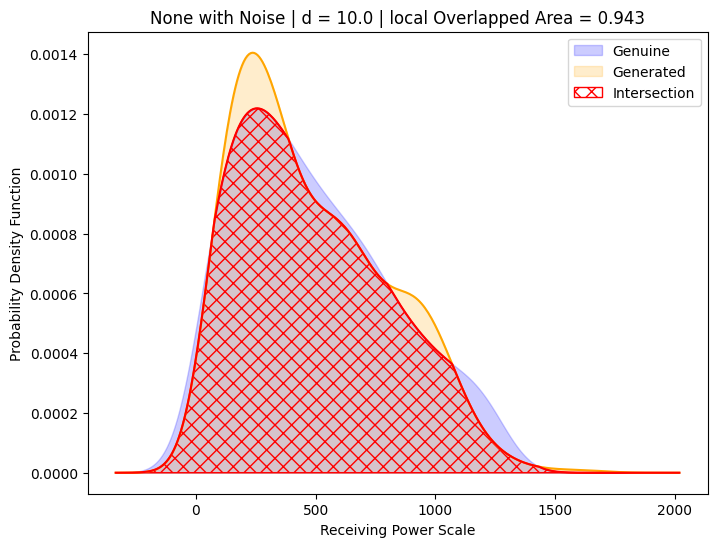

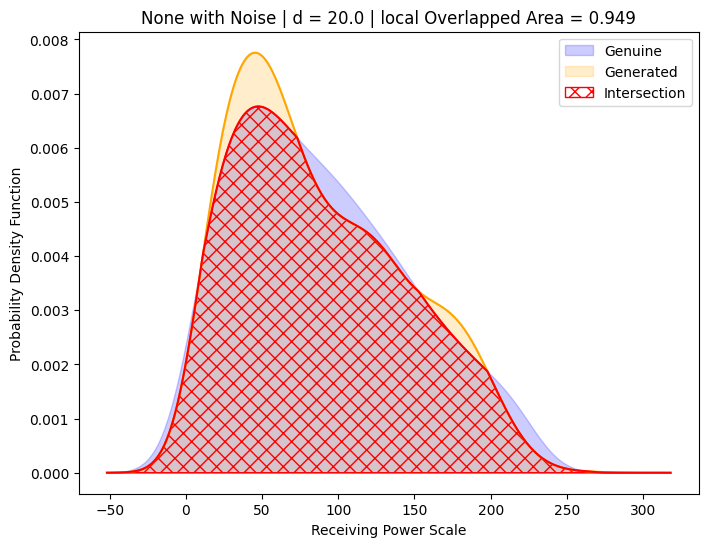

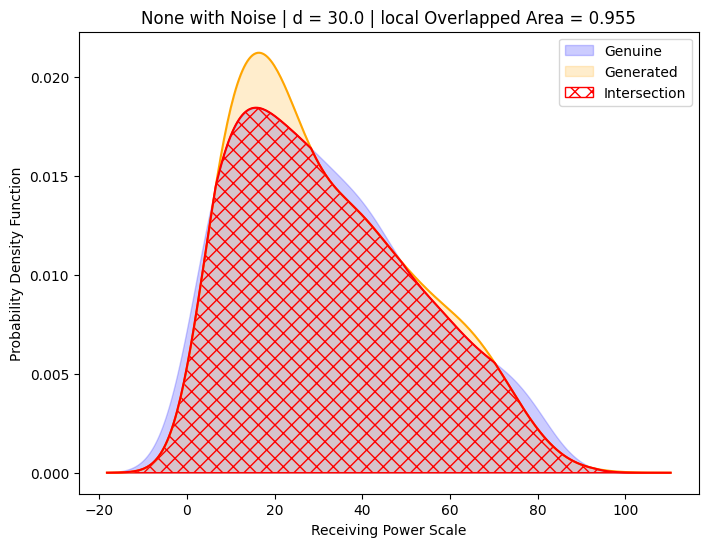

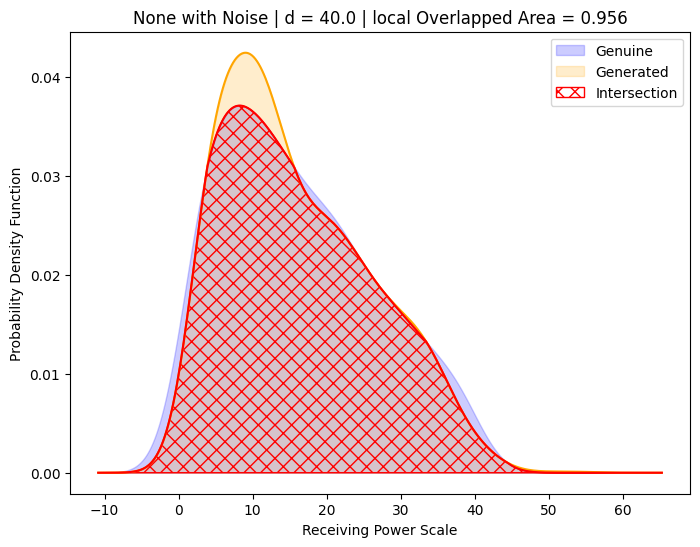

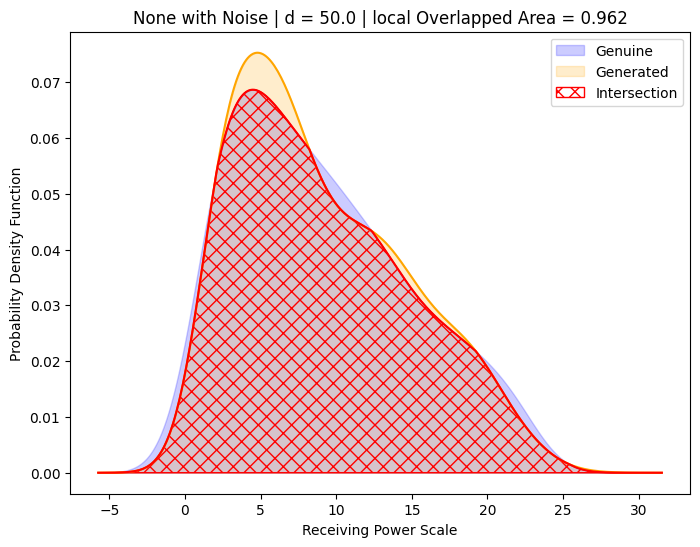

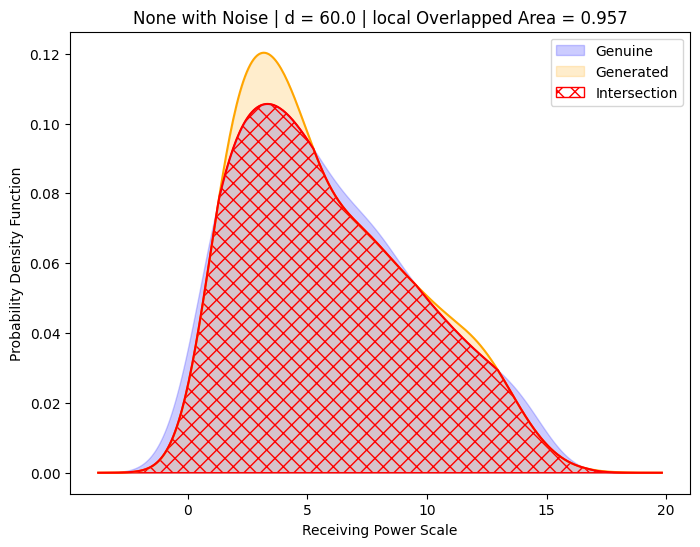

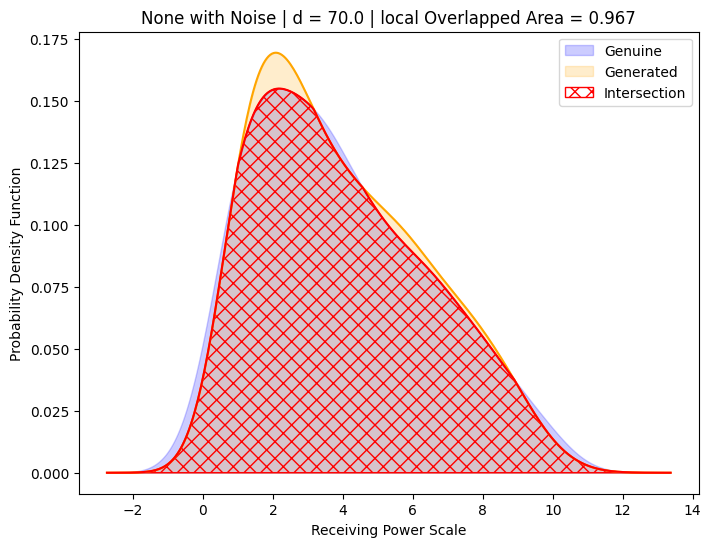

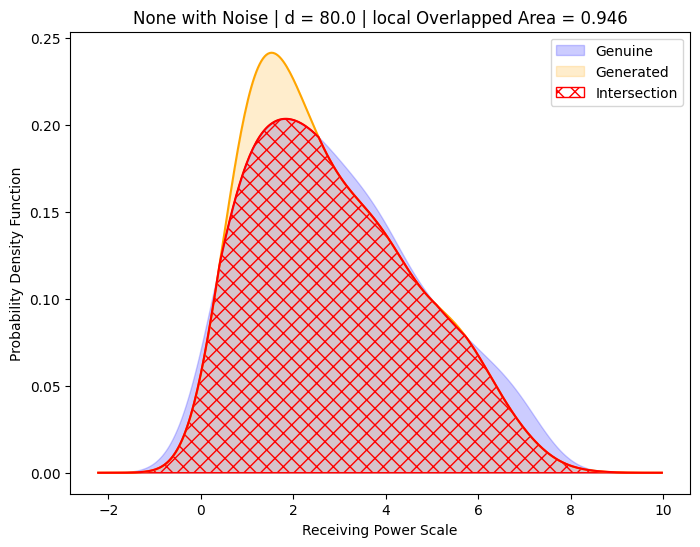

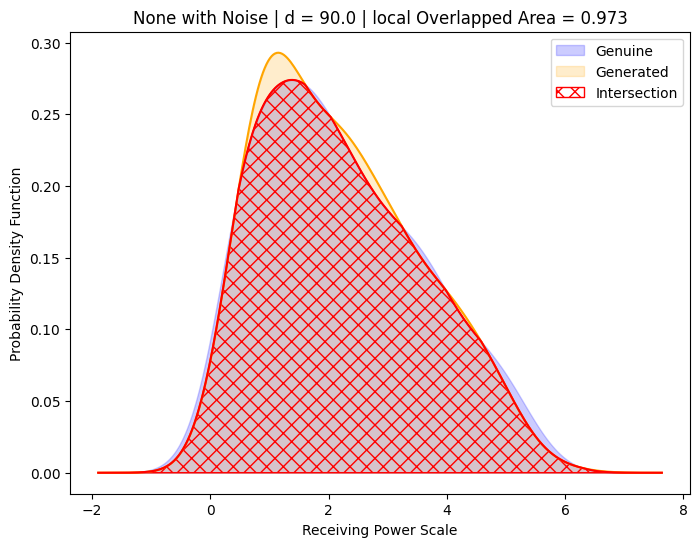

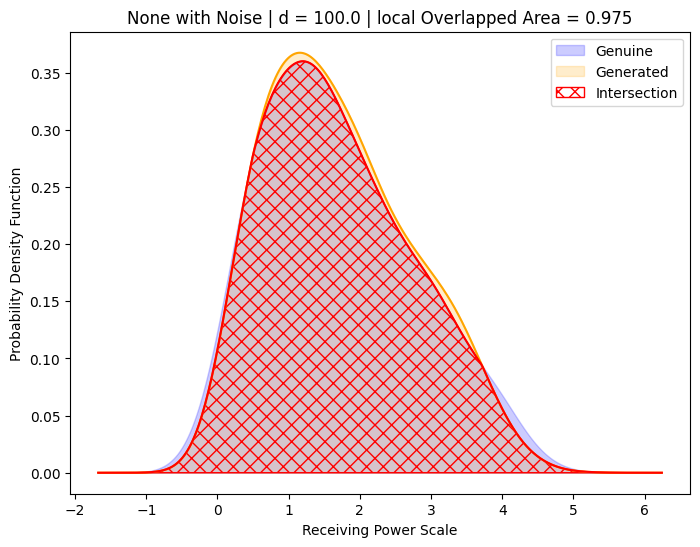

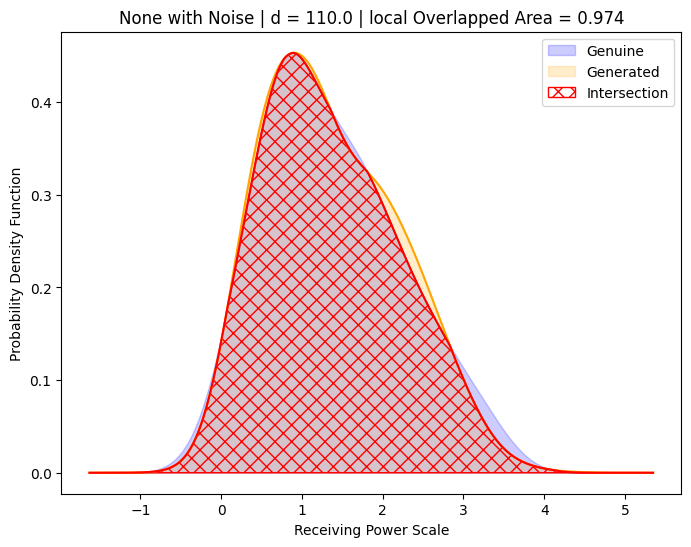

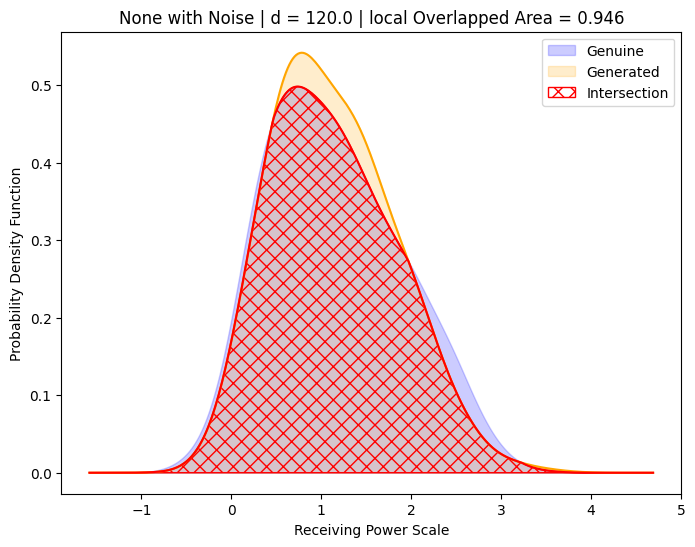

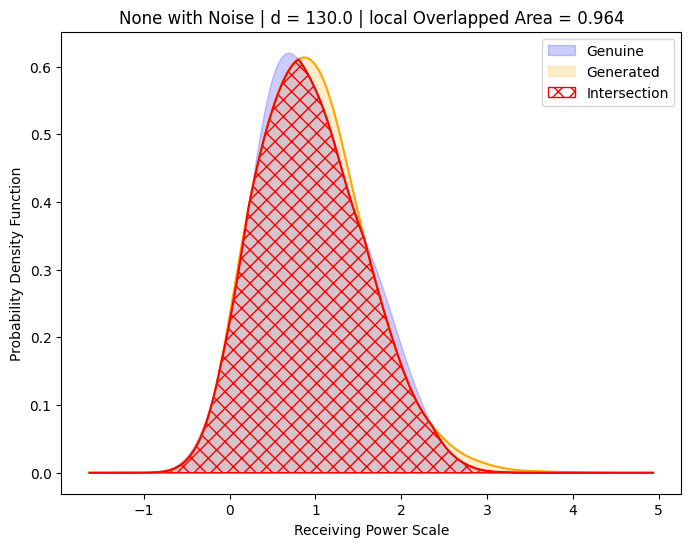

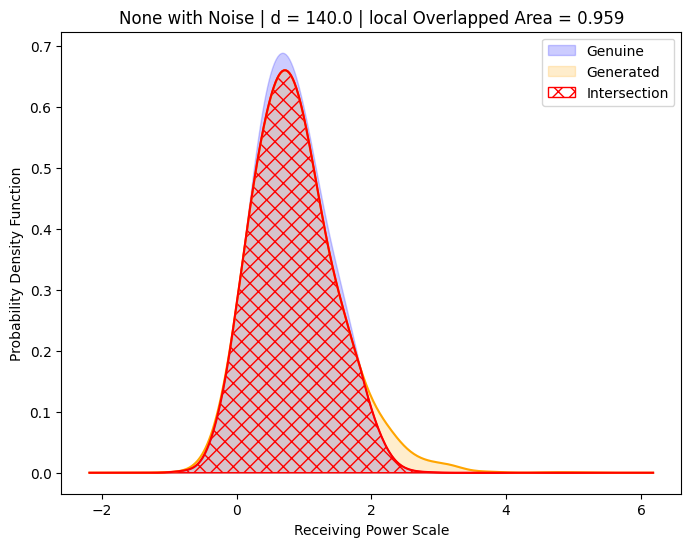

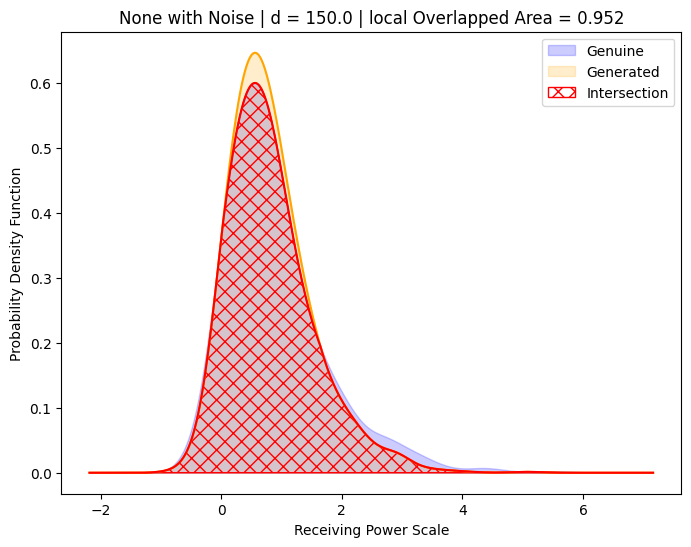

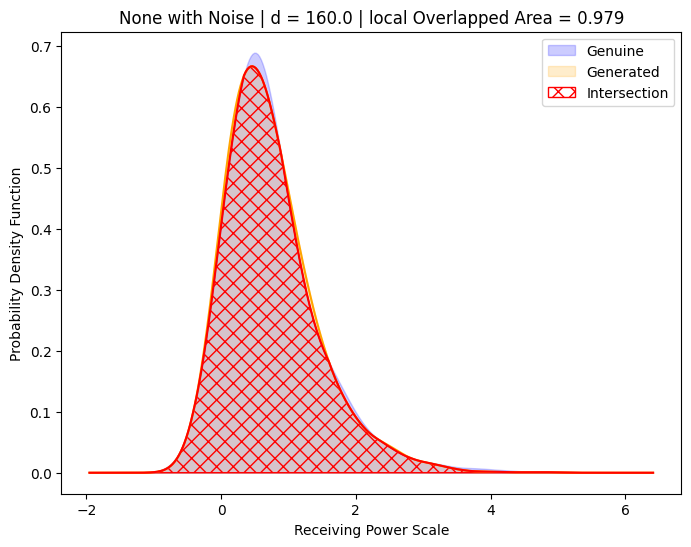

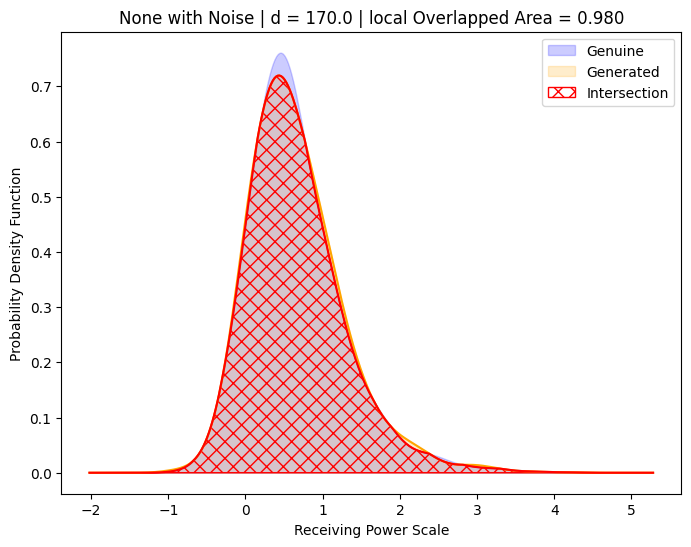

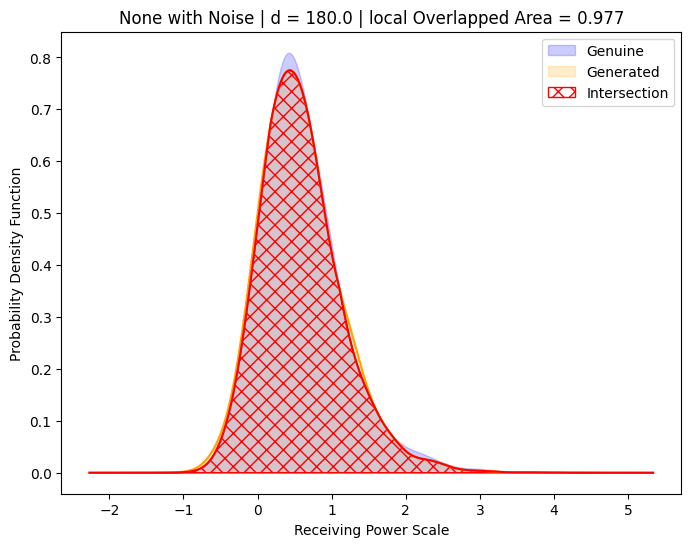

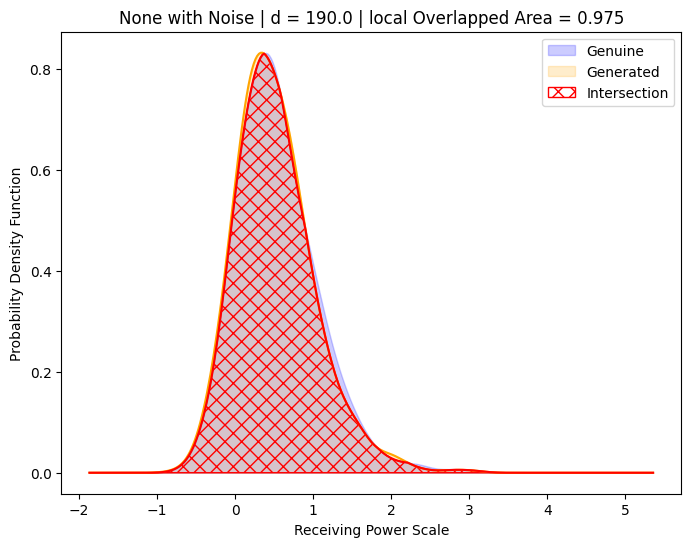

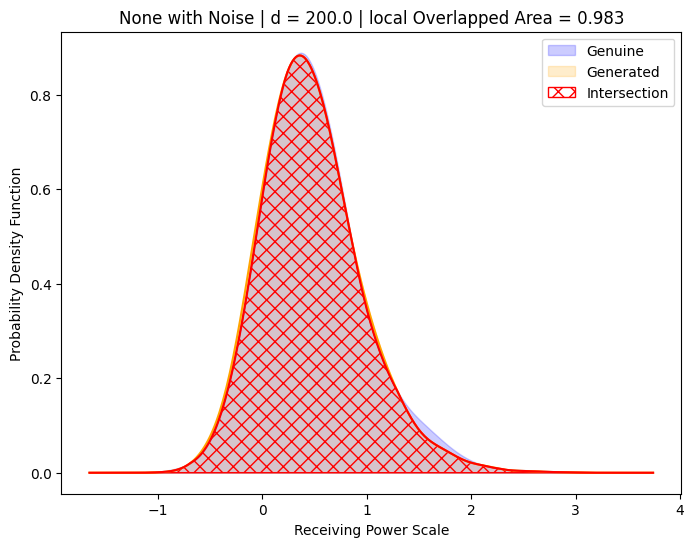

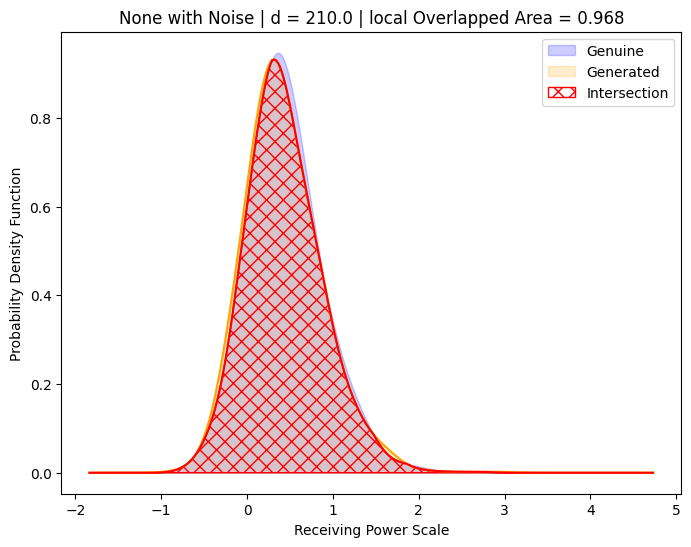

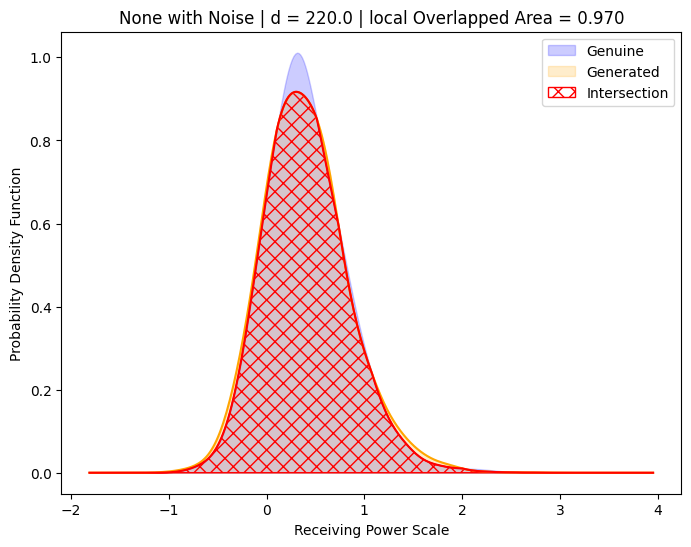

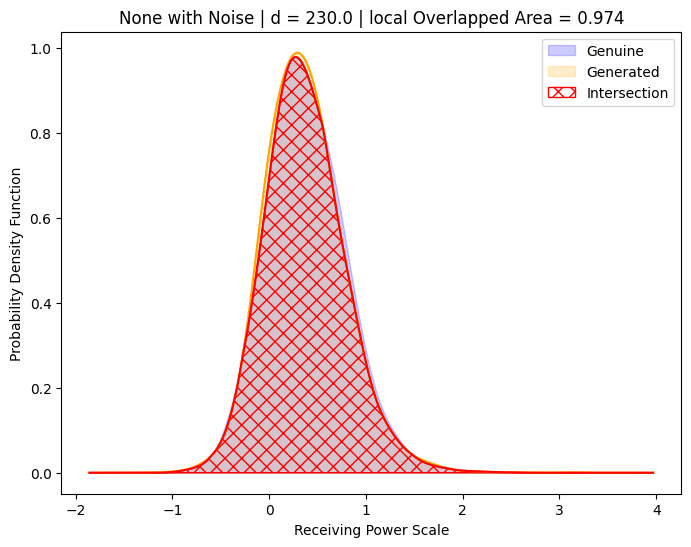

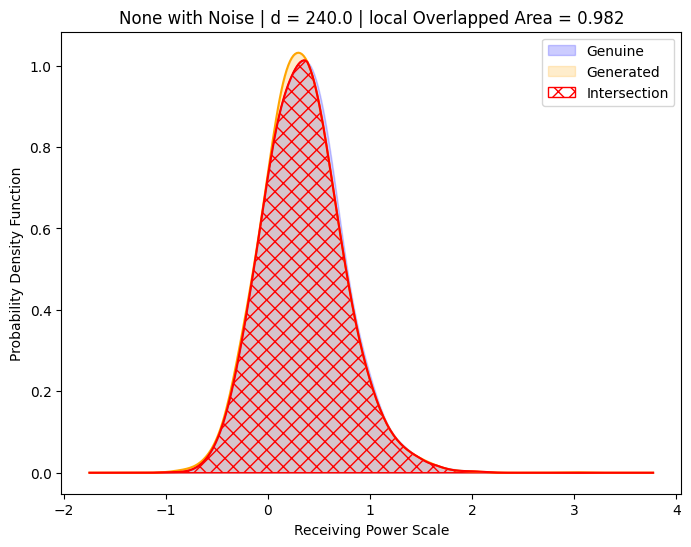

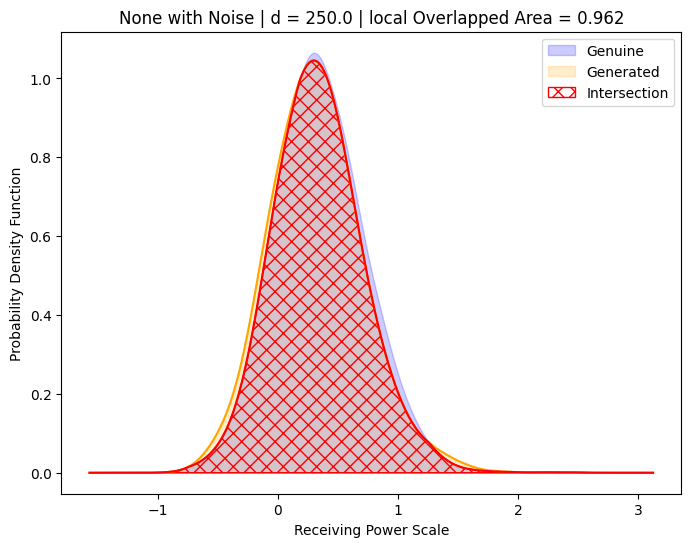

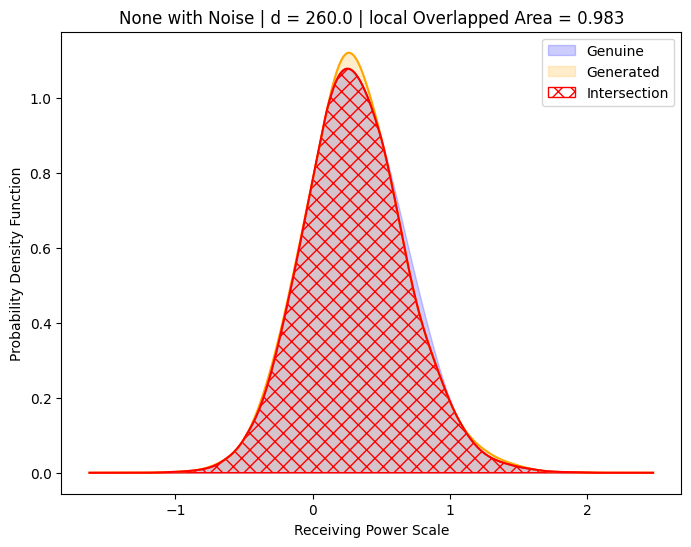

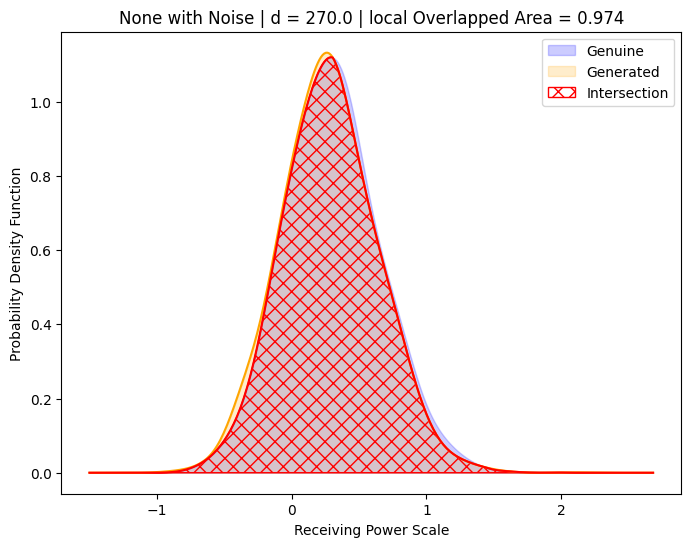

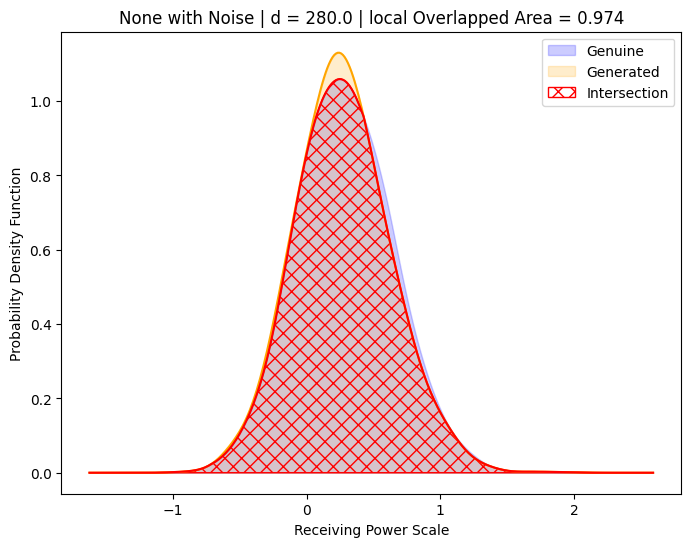

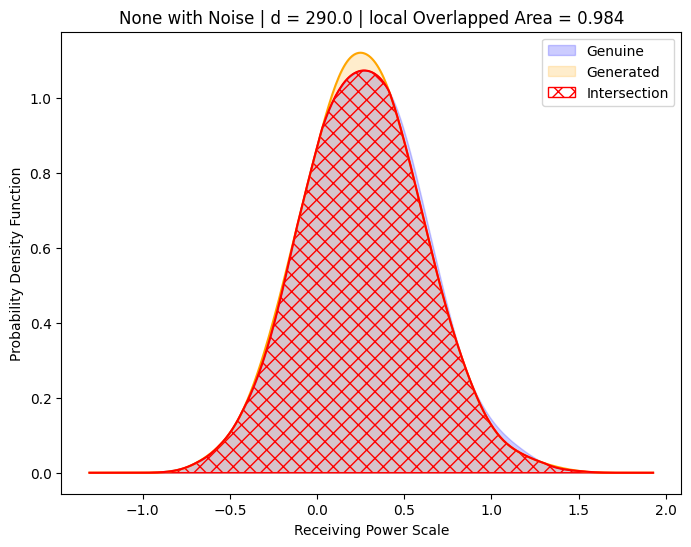

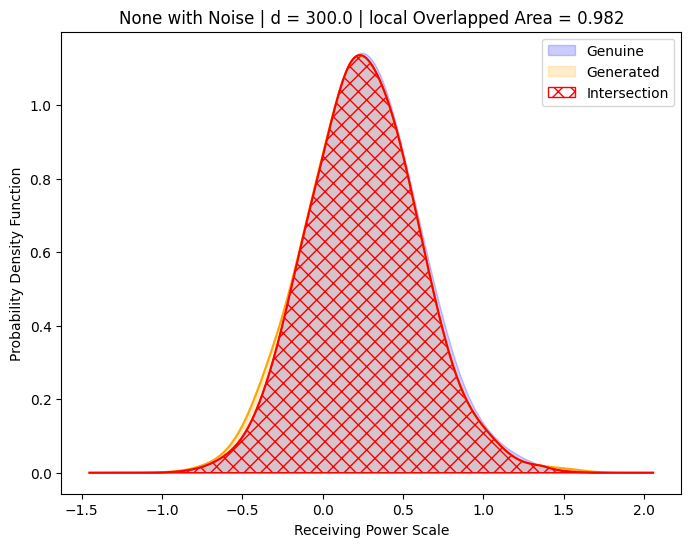

In [39]:
df_n2_f_oa_best = evaluations.evaluation_OA(
    df_to_evaluate=df_n2_f_test_back_scaled,
    name_model=None,
    dir_main_to_save=f"./evaluations",
    show_plot=True,
    to_save=False,
    # is_lognormal=True,
)

In [40]:
df_n2_f_oa_best

d  area_overlapped
0    0.0         0.943384
1    1.0         0.949477
2    2.0         0.954768
3    3.0         0.956340
4    4.0         0.962251
5    5.0         0.956565
6    6.0         0.967042
7    7.0         0.946482
8    8.0         0.972763
9    9.0         0.974727
10  10.0         0.973753
11  11.0         0.946213
12  12.0         0.964127
13  13.0         0.958992
14  14.0         0.951984
15  15.0         0.979011
16  16.0         0.980450
17  17.0         0.976826
18  18.0         0.974771
19  19.0         0.982894
20  20.0         0.968313
21  21.0         0.969798
22  22.0         0.973669
23  23.0         0.981810
24  24.0         0.962050
25  25.0         0.983110
26  26.0         0.973904
27  27.0         0.973809
28  28.0         0.984436
29  29.0         0.981970